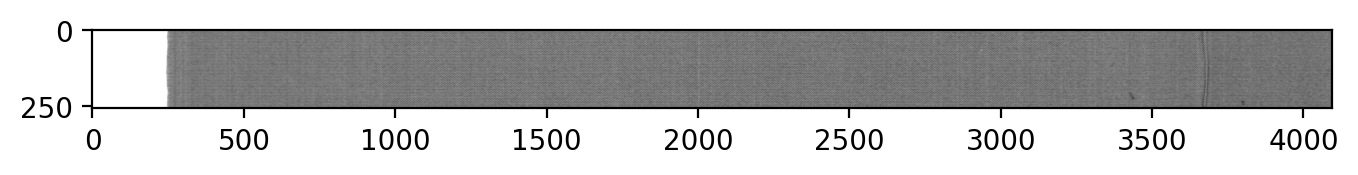

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time


plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200



master = cv2.imread("./tilingCode/0070_023_02.png")

plt.imshow(master)
plt.show()

In [63]:
class Tile:   
    x = 0
    y = 0
    width = 0
    height = 0
    imagex = 0
    imagey = 0
    roi = 0

    def __init__(self,x, y, overlap, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.imagex = x * (width - overlap)
        self.imagey = y * (height - overlap)

    def populate(self,master):
        y = self.imagey
        x = self.imagex
        height = self.height
        width = self.width
        self.roi = master[y:y+height, x:x+width]

In [64]:
image = np.array(master)  # can draw on this one, have to use np.copy or eles it passed by reference

t_width = 64
t_height = 64
overlap = 0

# get dimensions of image
dimensions = image.shape
 
# height, width, number of channels in image
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]

tilesInX = width / (t_width - overlap)
tilesInY = height / (t_height - overlap)

tiles = []

for y in range(int(tilesInY)):
    row = []
    for x in range(int(tilesInX)):
        tile = Tile(x,y,overlap,t_width,t_height)
        tile.populate(master)
        row.append(tile)
    tiles.append(row)
    

    


In [65]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

y = 0
x = 0
# for row in tiles:
#     x = 0
#     for tile in row:
#         plt.imshow(tile.roi)
#         plt.show()
#         print(x,y)
#         x = x+1
#     y=y+1
        

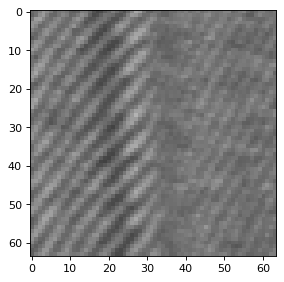

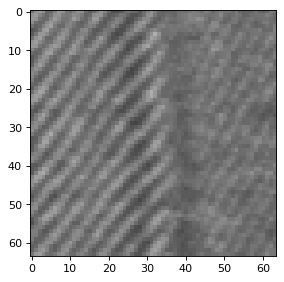

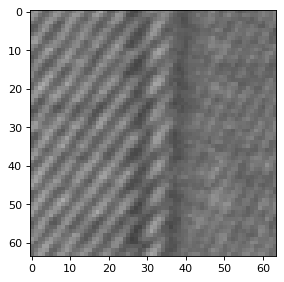

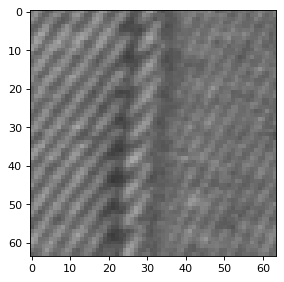

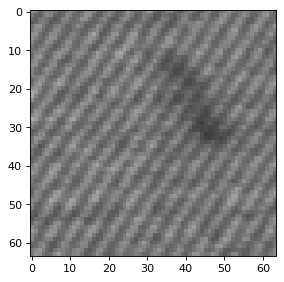

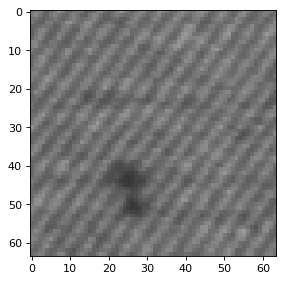

In [66]:
# know bad tiles (57,0), (57,1), (57,2), (57,3), (53,3), (59,3)
t_width = 64
t_height = 64
overlap = 0

defcetTiles = []
defcetTiles.append(Tile(57,0,overlap,t_width,t_height))
defcetTiles[0].populate(master)



defcetTiles.append(Tile(57,1,overlap,t_width,t_height))
defcetTiles[1].populate(master)



defcetTiles.append(Tile(57,2,overlap,t_width,t_height))
defcetTiles[2].populate(master)


defcetTiles.append(Tile(57,3,overlap,t_width,t_height))
defcetTiles[3].populate(master)


defcetTiles.append(Tile(53,3,overlap,t_width,t_height))
defcetTiles[4].populate(master)


defcetTiles.append(Tile(59,3,overlap,t_width,t_height))
defcetTiles[5].populate(master)


plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

for tile in defcetTiles:
    plt.imshow(tile.roi)
    plt.show()

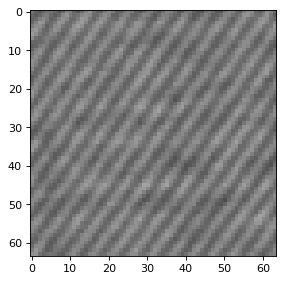

In [67]:
master_Tile1 = Tile(10,0,overlap,t_width,t_height)
master_Tile1.populate(master)

plt.imshow(master_Tile1.roi)

# Method 1: Histogram Comparison
Here I want to see if defective tiles can he compared using historgams. To start we see the histogram of a good tile

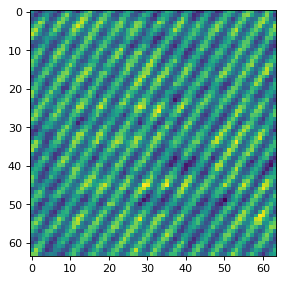

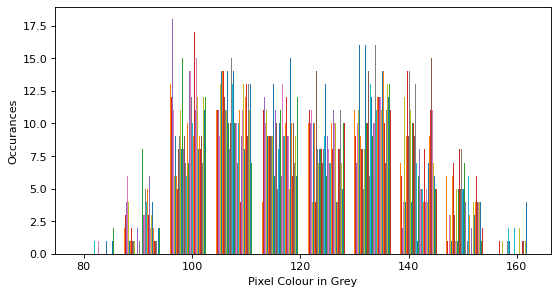

In [68]:
greyMaster = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale

plt.imshow(greyMaster)
plt.show()
plt.hist(greyMaster, bins = 10)
plt.xlabel("Pixel Colour in Grey")
plt.ylabel("Occurances")
plt.show()


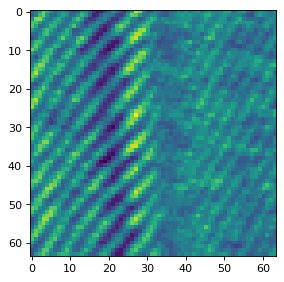

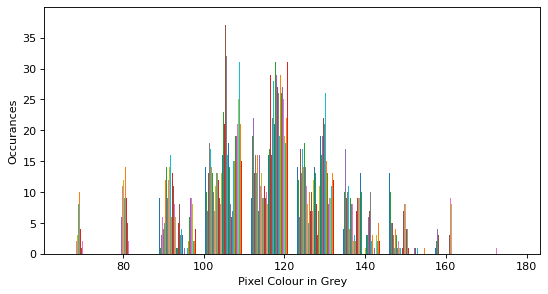

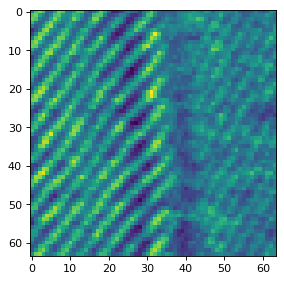

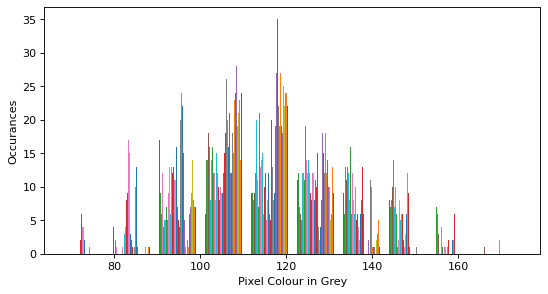

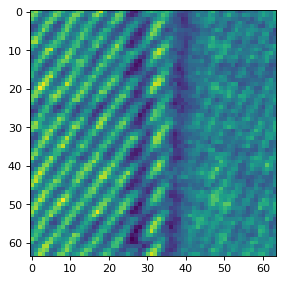

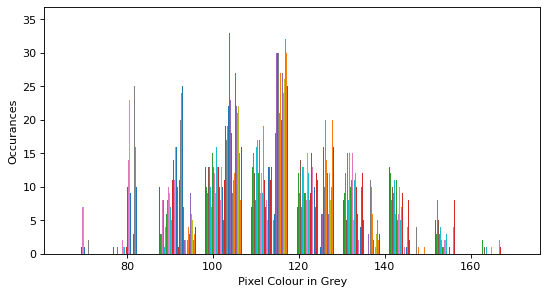

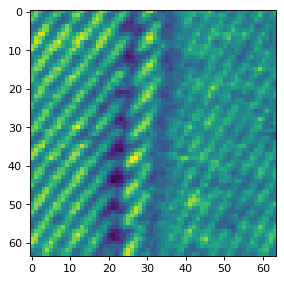

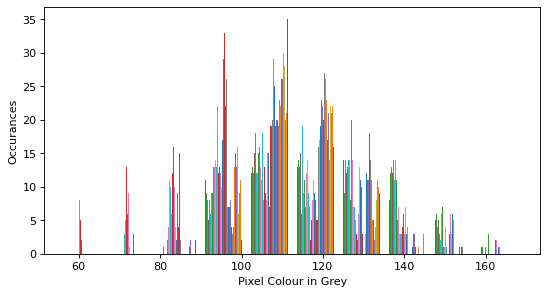

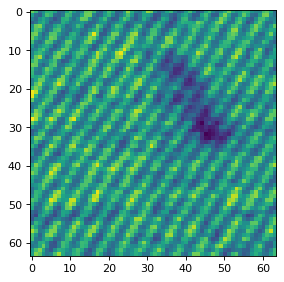

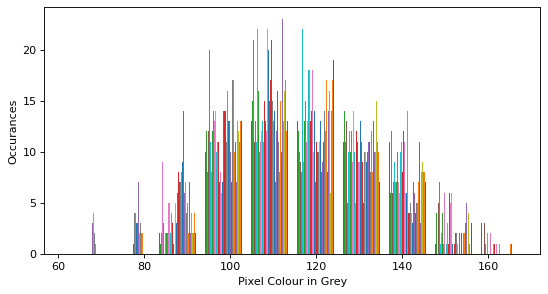

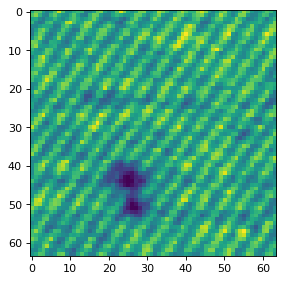

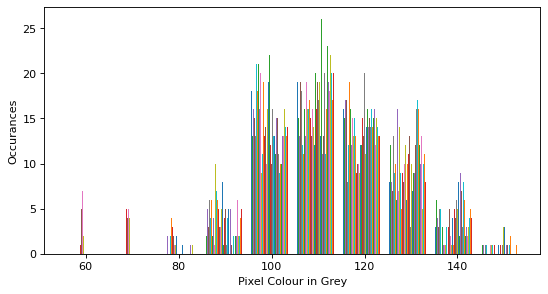

In [69]:
for tile in defcetTiles:
    grey = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    plt.hist(grey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()

It looks like the historgams of the defect tiles differ from the non defective tiles, so now i wat to compare more non defective tiles.

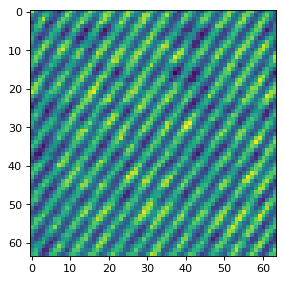

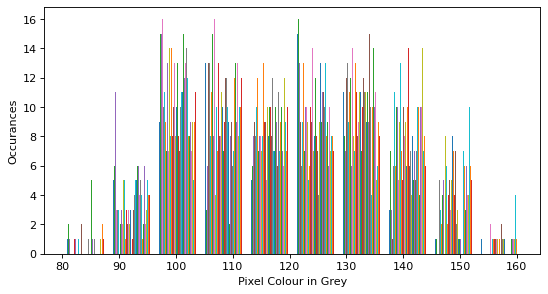

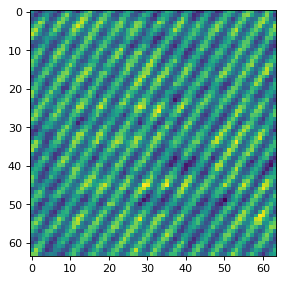

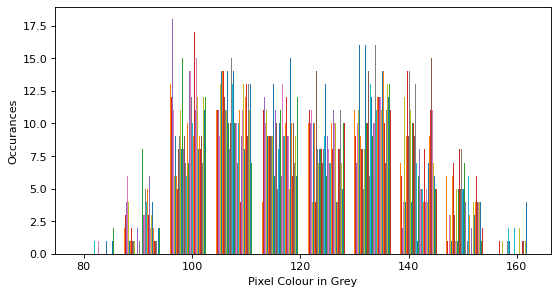

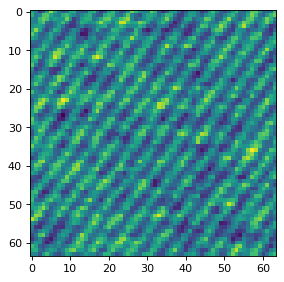

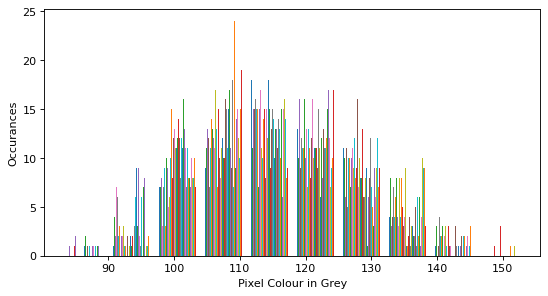

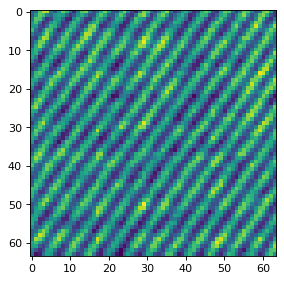

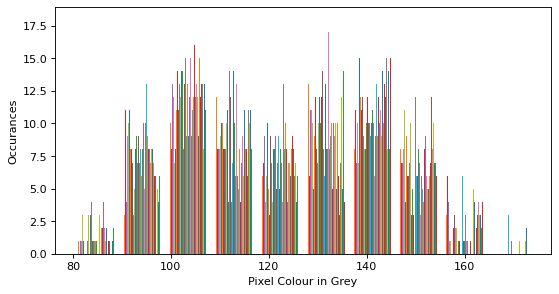

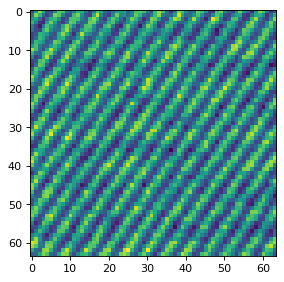

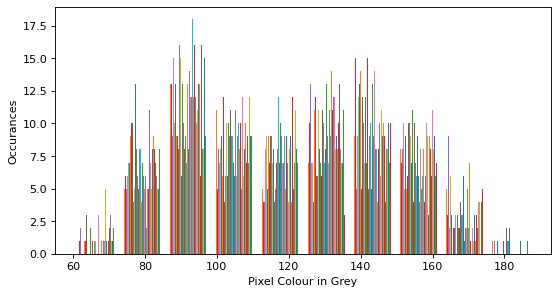

In [70]:
# take 5 non defective tiles
goodTiles = [
    tiles[1][10], tiles[0][10],  tiles[1][62],  tiles[3][14],  tiles[2][30]
]



for tile in goodTiles:
    grey = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    plt.hist(grey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()

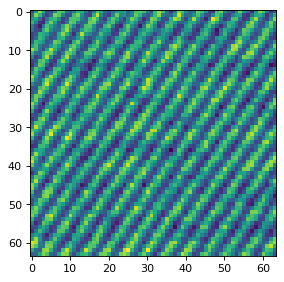

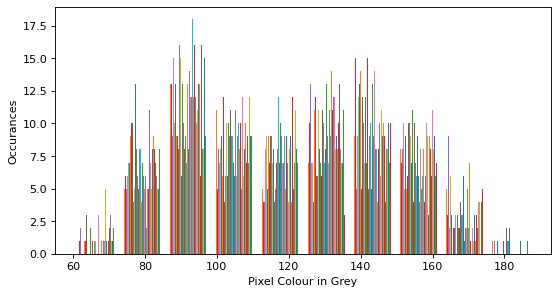

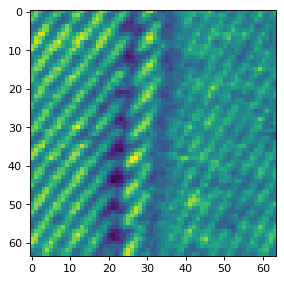

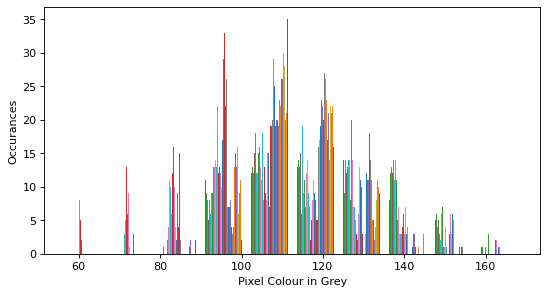

In [71]:
    grey = cv2.cvtColor(tiles[2][30].roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    plt.hist(grey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()
    
    grey = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    plt.hist(grey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()
    


What we see in all the defective tiles is a few pixel colours with much heigher counts than in good tiles. This could result in differentstandard dievations and higher ranges than a good tile.

Defects are likely to have high ranges as and depression or highspot will create both shadows and reflections.
    

# Using standard and Range
From the histogram above defective tiles are likely to have higher std and range than non defective.

In [72]:
def findRange(pic):
    lowest = 1000 # impossible in the image
    highest = 0
    
    for row in pic:
        for pixel in row:
            if pixel > highest:
                highest = pixel
            if pixel < lowest:
                lowest = pixel
    return highest - lowest

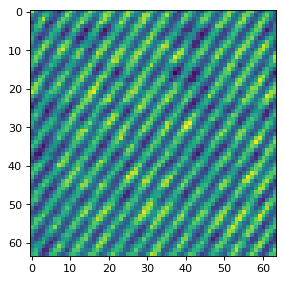

16.447580582525244
81


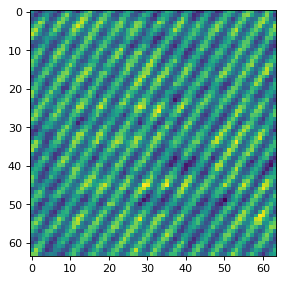

16.736848564661265
85


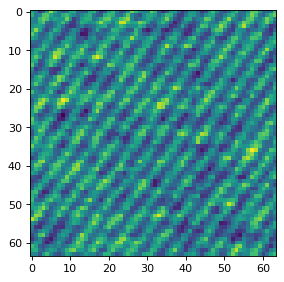

11.916624970574336
70


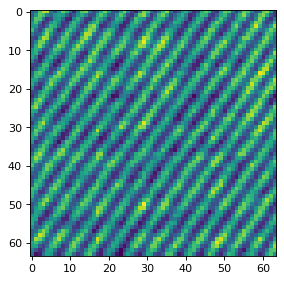

19.831896989032433
94


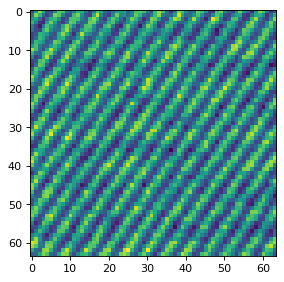

27.39516009287975
128


In [73]:
for tile in goodTiles:
    grey = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    print(np.std(grey))
    print(findRange(grey))

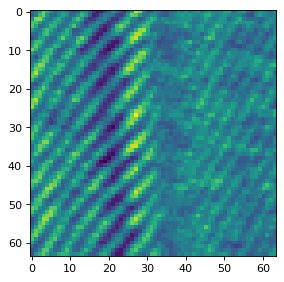

16.28931343013408
114


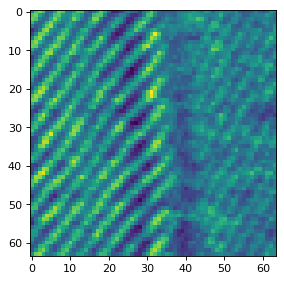

16.83943981729471
107


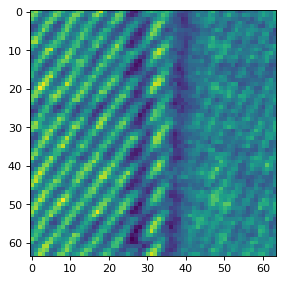

17.56912266767896
107


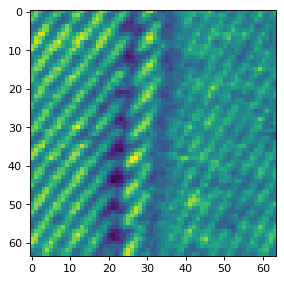

17.099428030606862
113


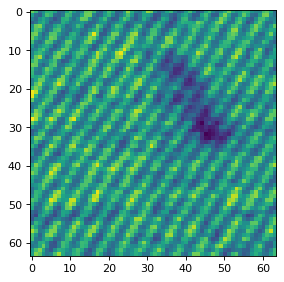

17.659052207844002
107


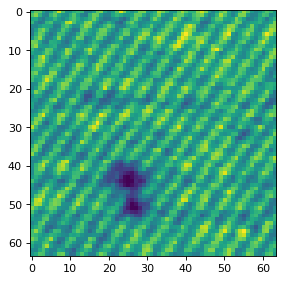

14.64208231078
99


In [74]:
for tile in defcetTiles:
    grey = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    print(np.std(grey))
    print(findRange(grey))

# Reducing colour space 
All colours seem to range between 60 and 200, if we take ten intervals and round all pixels to the closest interval we could see that defective tiles have abnormally high counts in certain intervals. To start I just rounded pixles down to clostest multiple of 20.

In [75]:
grey = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale

def roundPic(pic):
    new = []
    for col in pic:
        newCol = []
        for pixel in col:
            newCol.append(math.floor(pixel / 20.0)*20)
        new.append(newCol)
    return new


[[120 140 120 ... 100 100 120]
 [120 140 100 ... 100 100 120]
 [140 120 100 ... 100 100 100]
 ...
 [120 100 100 ... 120 120 100]
 [100 100 100 ... 120 100 100]
 [ 80 100 100 ... 100 100 100]]


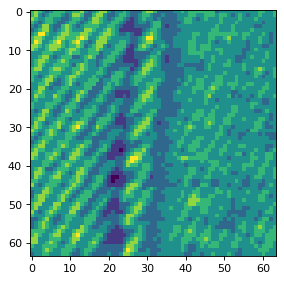

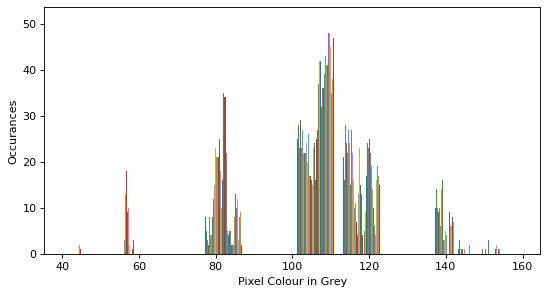

In [76]:
roundedGrey = np.asarray(roundPic(grey)) # have to convert back to numpy

print(roundedGrey)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

plt.imshow(roundedGrey)
plt.show()
plt.hist(roundedGrey, bins = 10)
plt.xlabel("Pixel Colour in Grey")
plt.ylabel("Occurances")
plt.show()

[[100  80  80 ... 140 120 100]
 [100  80 100 ... 140 100  80]
 [ 80 100 120 ... 140 100 100]
 ...
 [100 120 120 ... 100 100 120]
 [120 140 120 ...  80 100 120]
 [140 140 100 ... 100 120 120]]


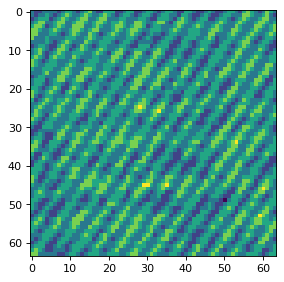

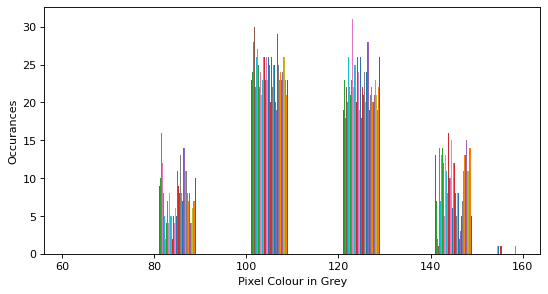

In [77]:
greyMaster = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) # grey master tile
roundedGrey = np.asarray(roundPic(greyMaster)) # have to convert back to numpy

print(roundedGrey)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

plt.imshow(roundedGrey)
plt.show()
plt.hist(roundedGrey, bins = 10)
plt.xlabel("Pixel Colour in Grey")
plt.ylabel("Occurances")
plt.show()

 This currently looks like it could work as we seen much higher counts in the defect tiles. We now look at 5 defective and 5 good tiles in the same way.

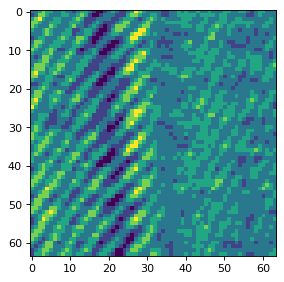

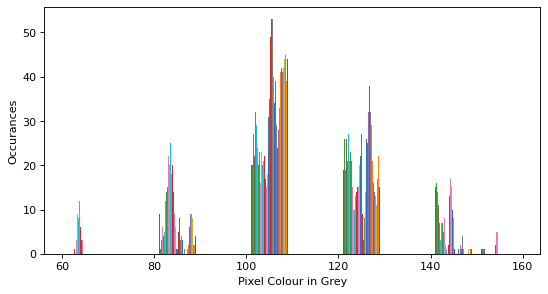

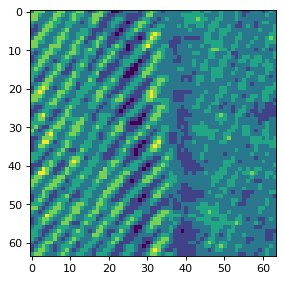

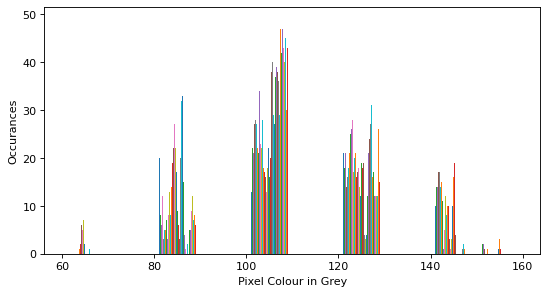

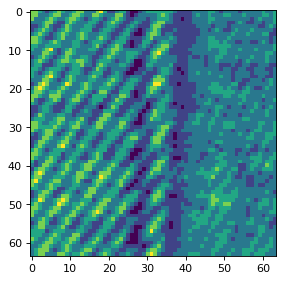

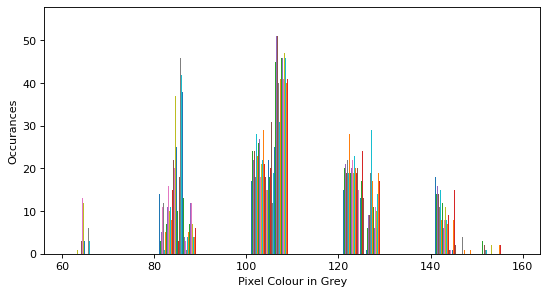

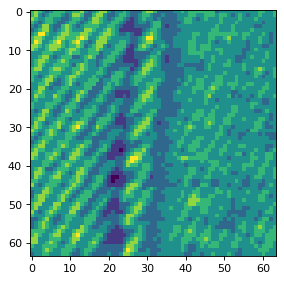

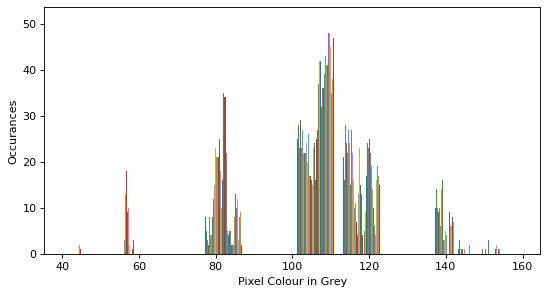

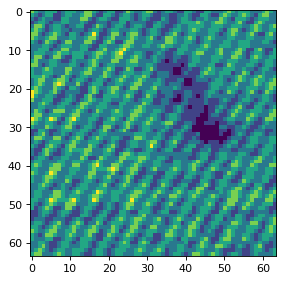

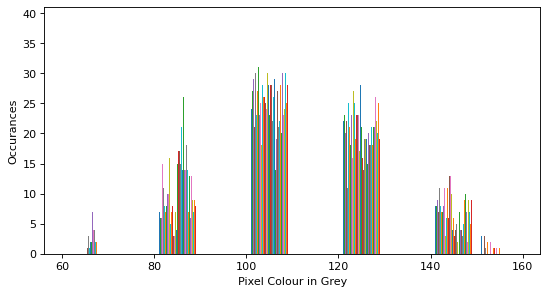

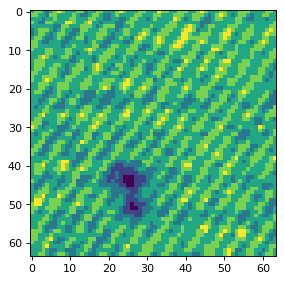

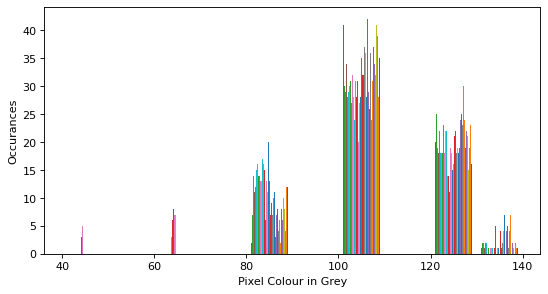

In [78]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80
    
for tile in defcetTiles:
    greyMaster = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # grey master tile
    roundedGrey = np.asarray(roundPic(greyMaster)) # have to convert back to numpy

    plt.imshow(roundedGrey)
    plt.show()
    plt.hist(roundedGrey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()

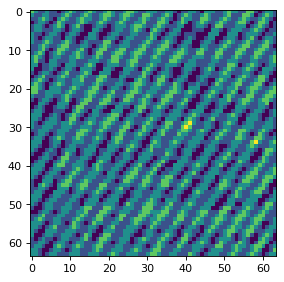

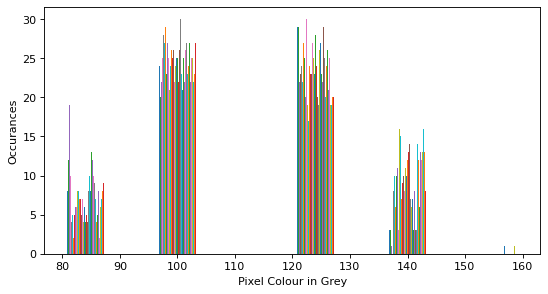

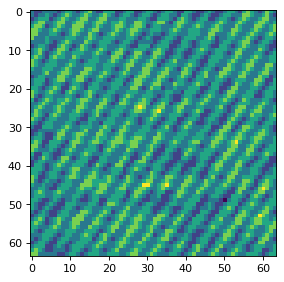

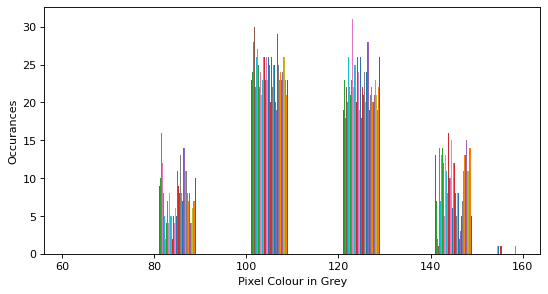

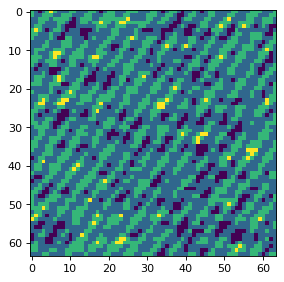

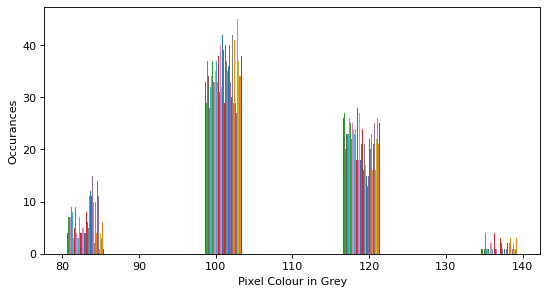

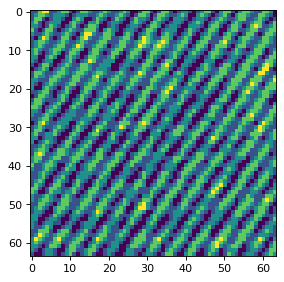

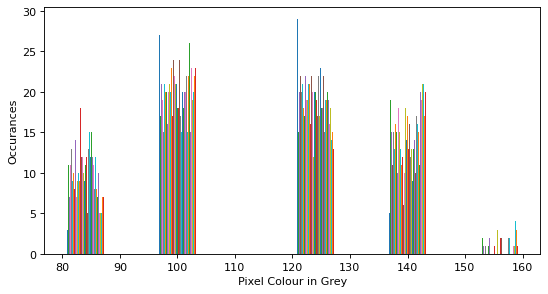

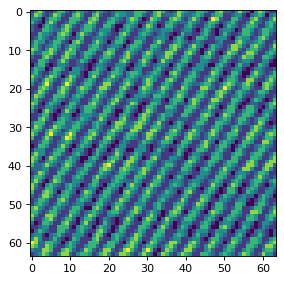

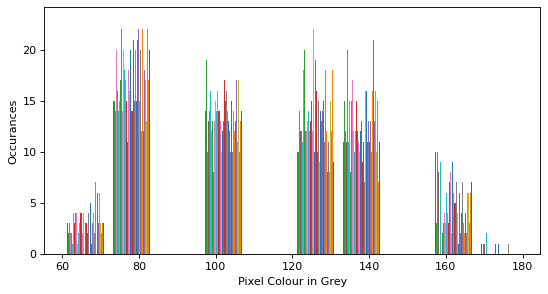

In [79]:
for tile in goodTiles:
    greyMaster = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # grey master tile
    roundedGrey = np.asarray(roundPic(greyMaster)) # have to convert back to numpy

    plt.imshow(roundedGrey)
    plt.show()
    plt.hist(roundedGrey, bins = 10)
    plt.xlabel("Pixel Colour in Grey")
    plt.ylabel("Occurances")
    plt.show()

# Reduced colour space comparison
One method could be splitting 0 - 255 into a set number of colours and rounding each pixel to the cloest colour then, comparing these intervals to know good values, Known good values can be taken from the means of many good tiles.

In [80]:
def roundPixel(pixel, intervals):
    bestInterval = 1000 # place holder
    diff = 1000 # place holder
    for interval in intervals:
        curDiff = abs(interval-pixel)
        if curDiff < diff: # will resulting on rounding up if lands exctly halfway
            diff = curDiff
            bestInterval = interval
    return np.uint8(bestInterval)

def roundTile(pic, intervals): # will also return the interval counts
    length = len(intervals) # inalise counts
    counts = []
    for i in range(0, length):
        counts.append(0)
        
    newPic = []
    for row in pic:
        newRow = []
        for pixel in row:
            temp = roundPixel(pixel, intervals)
            newRow.append(temp)
            index = intervals.index(temp)
            counts[index] = counts[index] + 1
        newPic.append(newRow)
    return np.asarray(newPic), counts
            
        
    
    

In [81]:
# testing above function

pixel = 105

intervals = [60, 90, 115, 120, 180]

# should return 115

print(roundPixel(pixel, intervals))

115


[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
[0, 0, 0, 0, 61, 1373, 1367, 1200, 95, 0, 0, 0, 0]
[[120 100  80 ... 140 120 100]
 [100 100 100 ... 140 120 100]
 [100 100 120 ... 140 120 100]
 ...
 [100 140 140 ... 100 100 120]
 [120 140 140 ... 100 100 140]
 [140 140 120 ... 100 120 120]]


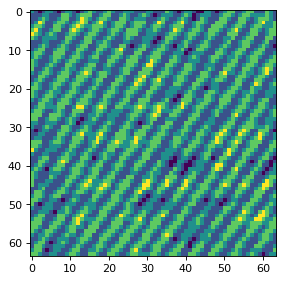

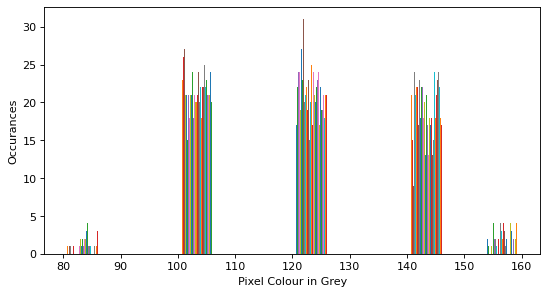

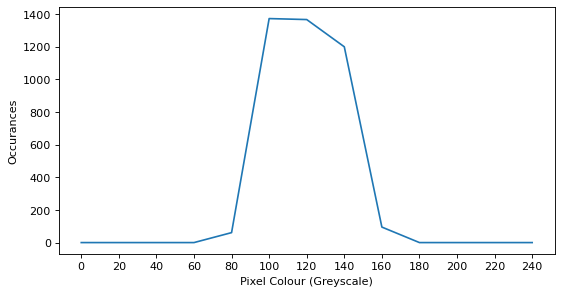

In [82]:
# testing above function
step = 20
start = 0 
end = 255
numSteps = int(end / step)

intervals = []

for i in range(0, numSteps+1):
    intervals.append(start + (i*step))

print(intervals)

greyMaster = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) # grey master tile

roundedGrey, counts = roundTile(greyMaster, intervals) # have to convert back to numpy

print(counts)
print(roundedGrey)
plt.imshow(roundedGrey)
plt.show()
plt.hist(roundedGrey, bins = numSteps)
plt.xlabel("Pixel Colour in Grey")
plt.ylabel("Occurances")
plt.show()

default_x_ticks = range(len(intervals))

plt.plot(default_x_ticks, counts)
plt.xticks(default_x_ticks, intervals)
plt.ylabel("Occurances")
plt.xlabel("Pixel Colour (Greyscale)")
plt.show()


[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
[0, 0, 0, 33, 152, 1671, 1741, 492, 7, 0, 0, 0, 0]
[[120 120 120 ... 120 120 100]
 [120 140 120 ... 120 100 100]
 [120 120 100 ... 100 100 120]
 ...
 [120 100 100 ... 100 120 120]
 [100 100 120 ... 120 120 120]
 [100 120 120 ... 120 120 100]]


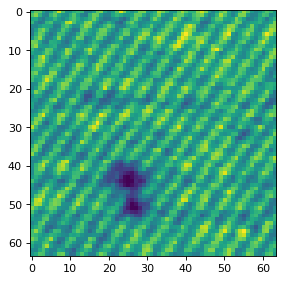

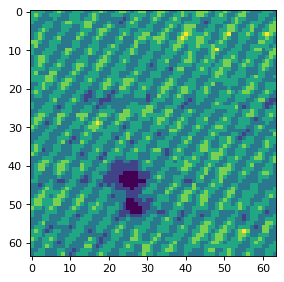

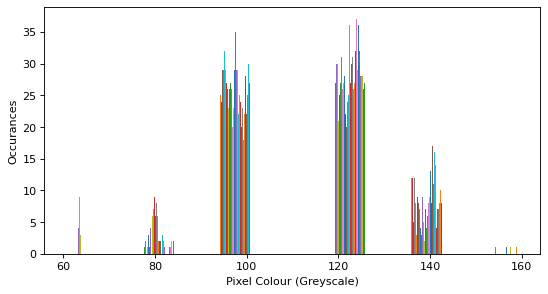

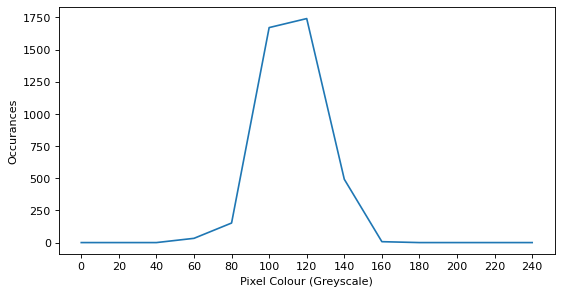

In [83]:
grey = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) # grey master tile

roundedGrey, counts = roundTile(grey, intervals) # have to convert back to numpy

print(intervals)
print(counts)
print(roundedGrey)
plt.imshow(grey)
plt.show()
plt.imshow(roundedGrey)
plt.show()
plt.hist(roundedGrey, bins = numSteps)
plt.xlabel("Pixel Colour (Greyscale)")
plt.ylabel("Occurances")
plt.show()

default_x_ticks = range(len(intervals))

plt.plot(default_x_ticks, counts)
plt.xticks(default_x_ticks, intervals)
plt.ylabel("Occurances")
plt.xlabel("Pixel Colour (Greyscale)")
plt.show()


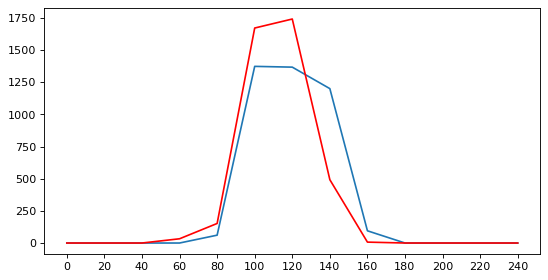

In [84]:
greyMaster = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) # grey master tile
roundedGrey, counts = roundTile(greyMaster, intervals) # have to convert back to numpy
default_x_ticks = range(len(intervals))
plt.plot(default_x_ticks, counts)
plt.xticks(default_x_ticks, intervals)
grey = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY)
DefectRoundedGrey, DefcetCounts = roundTile(grey, intervals) 
plt.plot(default_x_ticks, DefcetCounts, color="red")

plt.show()

5
6


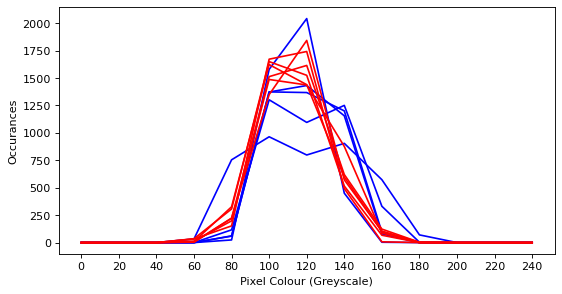

In [89]:
for tile in goodTiles:
    greyMaster = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # grey master tile
    roundedGrey, counts = roundTile(greyMaster, intervals) # have to convert back to numpy
    default_x_ticks = range(len(intervals))
    plt.plot(default_x_ticks, counts, color = "blue")
    plt.xticks(default_x_ticks, intervals)

for tile in defcetTiles:
    greyMaster = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # grey master tile
    roundedGrey, counts = roundTile(greyMaster, intervals) # have to convert back to numpy
    default_x_ticks = range(len(intervals))
    plt.plot(default_x_ticks, counts, color = "red")
    plt.xticks(default_x_ticks, intervals)

print(len(goodTiles))
print(len(defcetTiles))

plt.ylabel("Occurances")
plt.xlabel("Pixel Colour (Greyscale)")
plt.show()


This doesnt seem to differentaite them enough. However this could change if we lowered tile size to make the defects take up a larger percentage of the tile.

# Blob detection
With the reduced colour space I belive blobs will be easier to dectect.

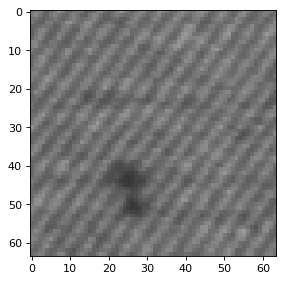

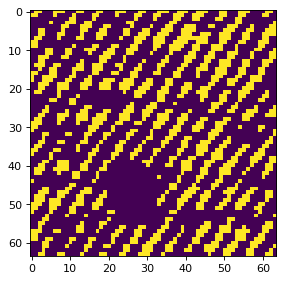

100
()


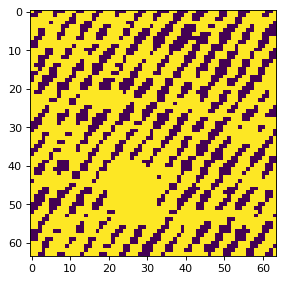

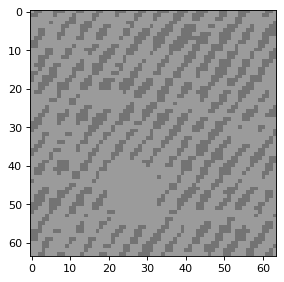

In [90]:
# trying with only 2 colors
intervals = [100,140]
greyMaster = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) # grey blob defect
roundedGrey, counts = roundTile(greyMaster, intervals) 

plt.imshow(defcetTiles[5].roi)
plt.show()
plt.imshow(roundedGrey)
plt.show()

ori = defcetTiles[5].roi
im = roundedGrey
print(roundedGrey[0][0])
im = cv2.bitwise_not(im) #swaps black and white 
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

print(keypoints)

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()


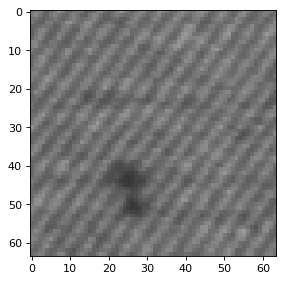

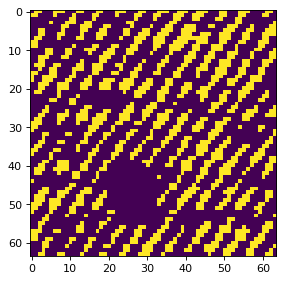

100
()


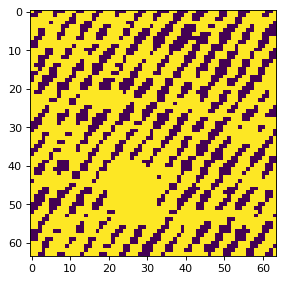

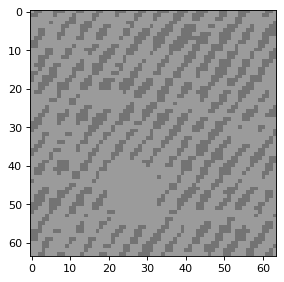

In [91]:
# trying with only 2 colors
intervals = [100,140]
greyMaster = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) # grey blob defect
roundedGrey, counts = roundTile(greyMaster, intervals) 

plt.imshow(defcetTiles[5].roi)
plt.show()
plt.imshow(roundedGrey)
plt.show()

params = cv2.SimpleBlobDetector_Params()

# for dark blobs
# params.filterByColor = 1
#params.blobColor = 0
 
# for light blobs
params.filterByColor = 1
params.blobColor = 255
    
# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 400;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 20
params.maxArea = 300

 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1
 
# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.87
 
# # Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.0
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)


ori = defcetTiles[5].roi
im = roundedGrey
print(roundedGrey[0][0])
im = cv2.bitwise_not(im) #swaps black and white 
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

print(keypoints)

plt.imshow(im)
plt.show()

plt.imshow(im_with_keypoints)
plt.show()


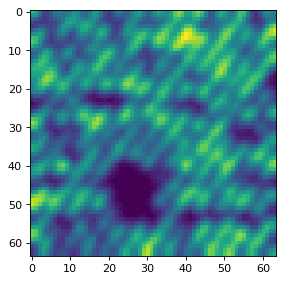

In [92]:
blur_image = cv2.GaussianBlur(roundedGrey, (7,7), 0)

plt.imshow(blur_image)
plt.show()

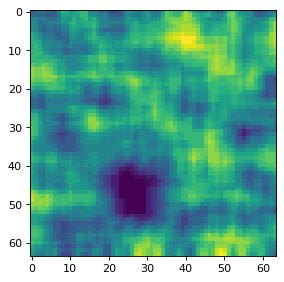

In [93]:
blur_image = cv2.blur(roundedGrey, (7,7))

plt.imshow(blur_image)
plt.show()

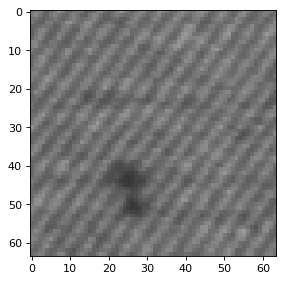

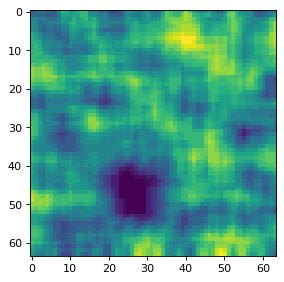

()


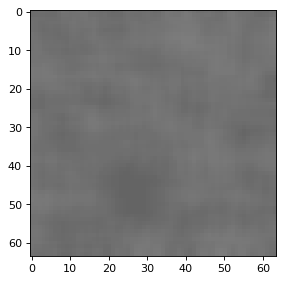

In [94]:
# trying with only 2 colors
intervals = [100,140]
greyMaster = cv2.cvtColor(defcetTiles[5].roi, cv2.COLOR_BGR2GRAY) # grey blob defect
roundedGrey, counts = roundTile(greyMaster, intervals) 

params = cv2.SimpleBlobDetector_Params()

# for dark blobs
# params.filterByColor = 1
#params.blobColor = 0
 
# for light blobs
params.filterByColor = 1
params.blobColor = 255
    
# Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 400;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 20
params.maxArea = 300

 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1
 
# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.87
 
# # Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.0
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)



ori = defcetTiles[5].roi

plt.imshow(ori)
plt.show()

im = cv2.blur(roundedGrey, (7,7))

plt.imshow(im)
plt.show()

#im = cv2.bitwise_not(im) #swaps black and white 
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

print(keypoints)

plt.imshow(im_with_keypoints)
plt.show()


# Using countors to find blobs

The following function worked and found all defects but normal tiles with a darker weave or shadows would appear as false posotives.

In [95]:
def findBlobC(img):
    greyMaster = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grey blob defect
    roundedGrey, counts = roundTile(greyMaster, intervals) 
#     img = cv2.blur(roundedGrey, (7,7))
    img = cv2.blur(greyMaster, (15,15))
    # convert img to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = img
    # do adaptive threshold on gray image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 3)

    # apply morphology open then close
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    blob = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)

    # invert blob
    blob = (255 - blob)

    # Get contours
    cnts = cv2.findContours(blob, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    if(len(cnts) == 0):
        print("no countours")
        return
    
    big_contour = max(cnts, key=cv2.contourArea)

    # test blob size
    blob_area_thresh = 500
    blob_area = cv2.contourArea(big_contour)
    if blob_area < blob_area_thresh:
        print("Blob Is Too Small")
        return

    # draw contour
    result = img.copy()
    cv2.drawContours(result, [big_contour], -1, (0,0,255), 1)

        
    plt.imshow(greyMaster)
    plt.show()
    plt.imshow(img)
    plt.show()
    plt.imshow(thresh)
    plt.show()
    plt.imshow(blob)
    plt.show()
    plt.imshow(result)
    plt.show()

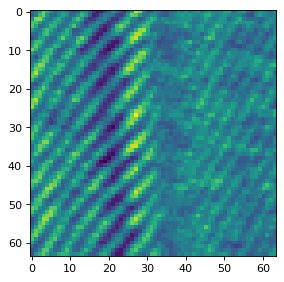

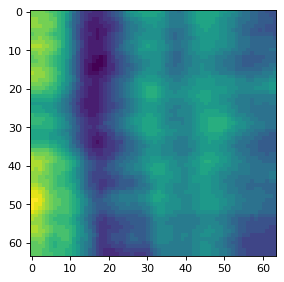

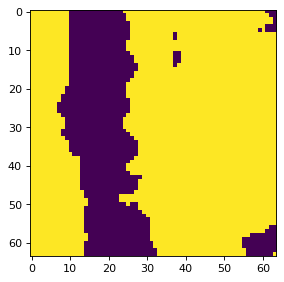

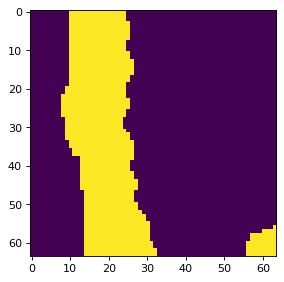

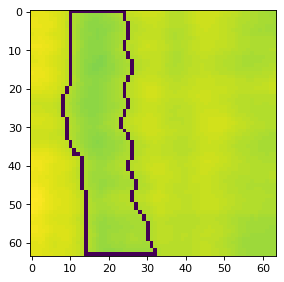

-----------------------------------------------------------


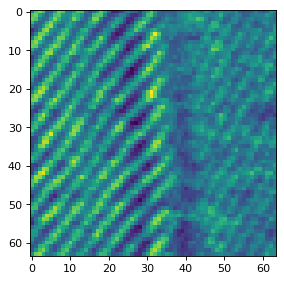

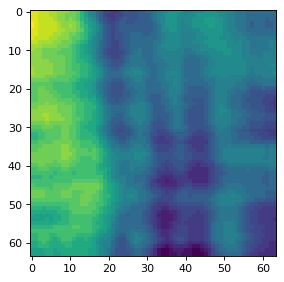

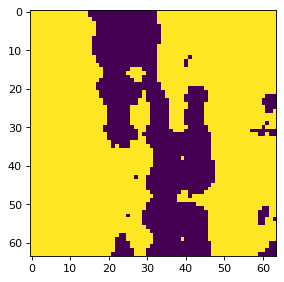

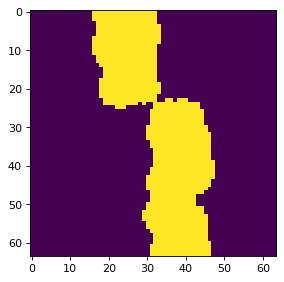

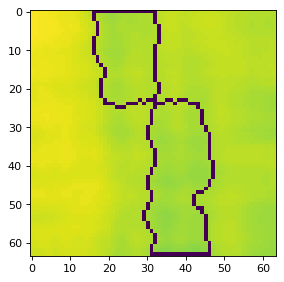

-----------------------------------------------------------


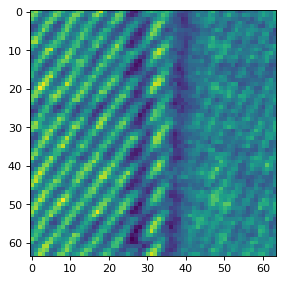

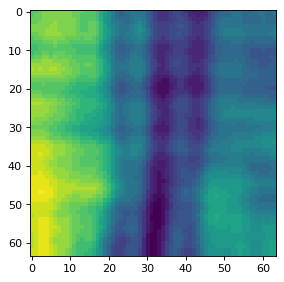

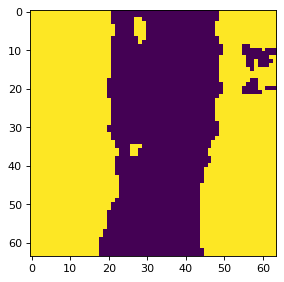

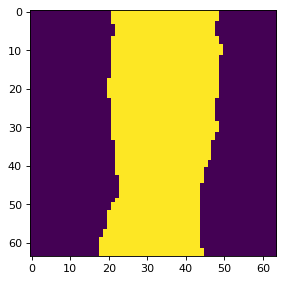

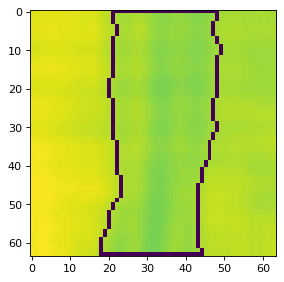

-----------------------------------------------------------


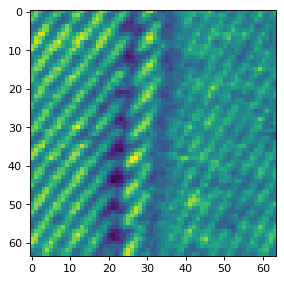

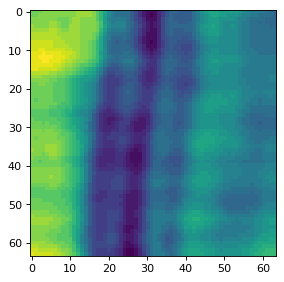

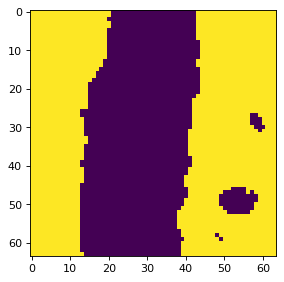

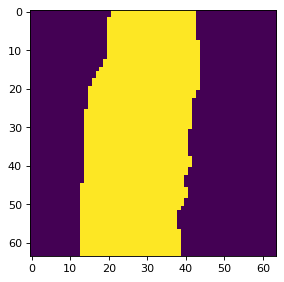

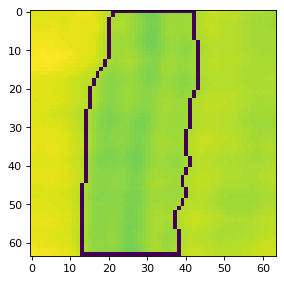

-----------------------------------------------------------


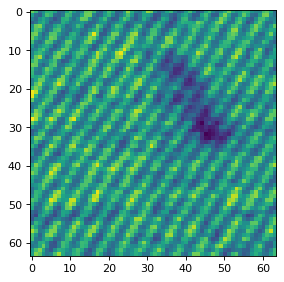

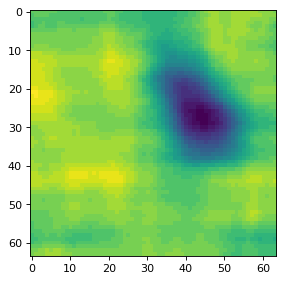

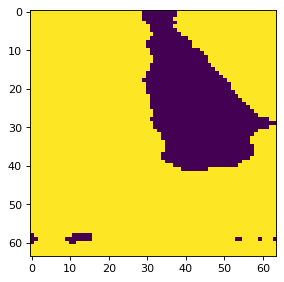

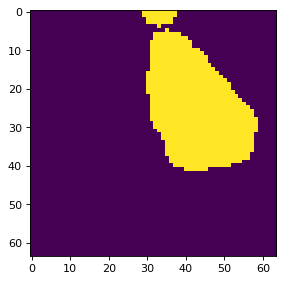

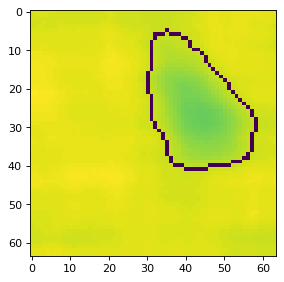

-----------------------------------------------------------


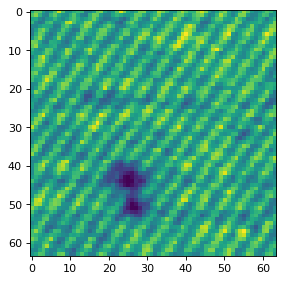

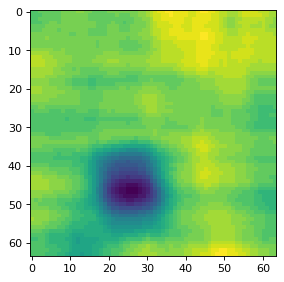

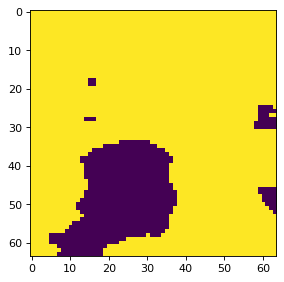

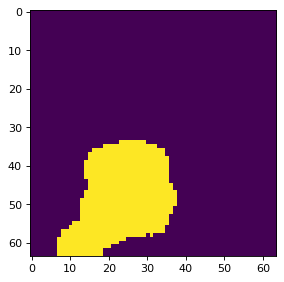

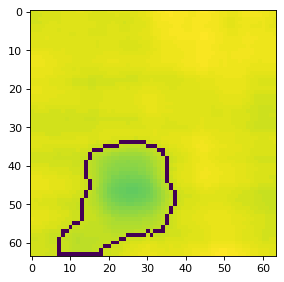

-----------------------------------------------------------


In [96]:
for tile in defcetTiles:
    findBlobC(tile.roi)
    print("-----------------------------------------------------------")


In [97]:
# findBlobC(goodTiles[4].roi)
for tile in goodTiles:
    findBlobC(tile.roi)
    print("-----------------------------------------------------------")

no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


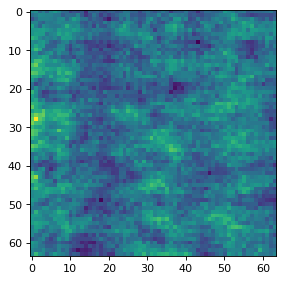

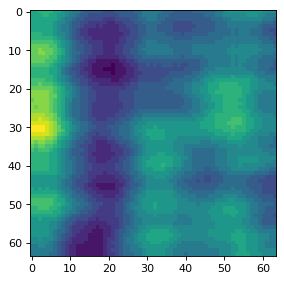

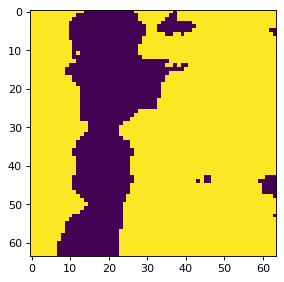

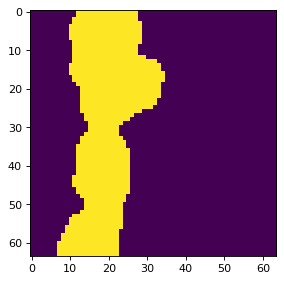

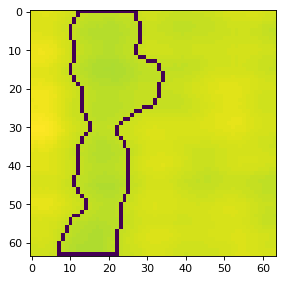

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


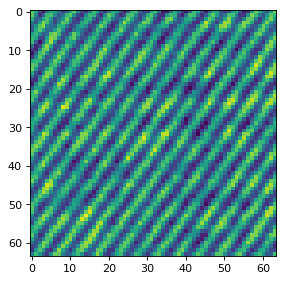

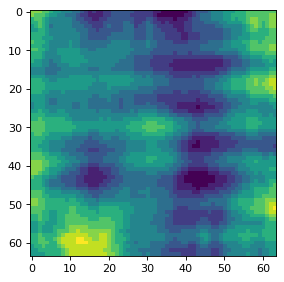

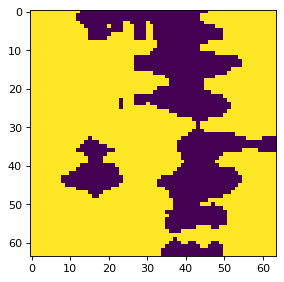

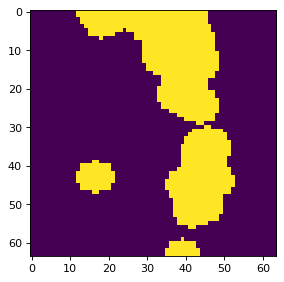

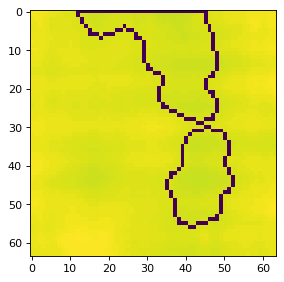

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no counto

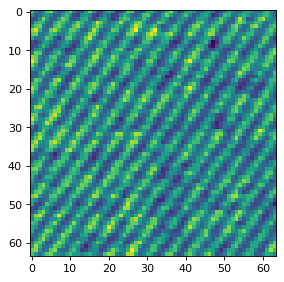

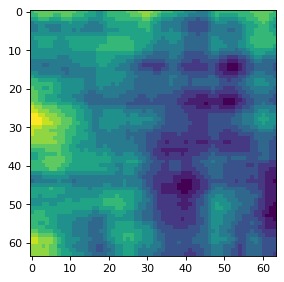

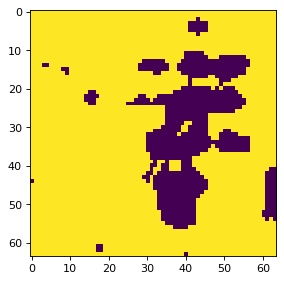

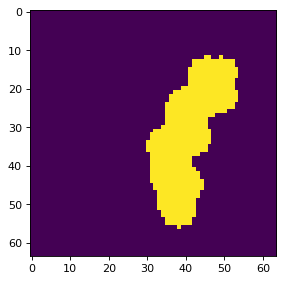

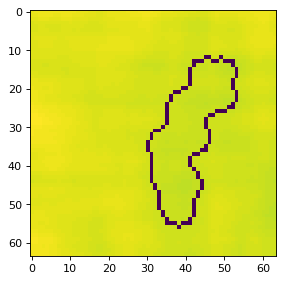

-----------------------------------------------------------


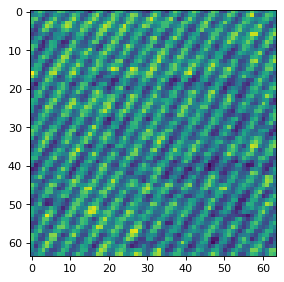

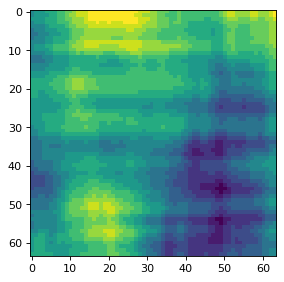

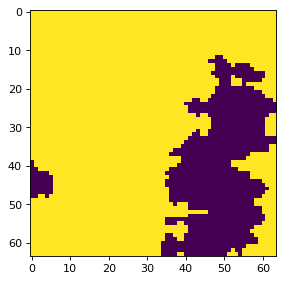

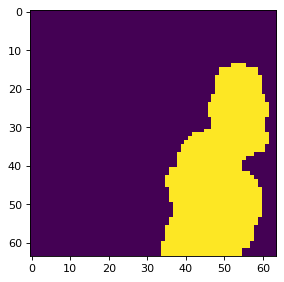

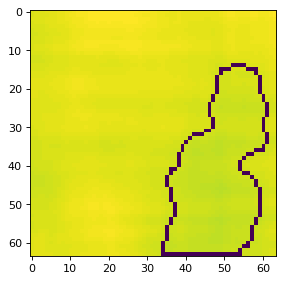

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


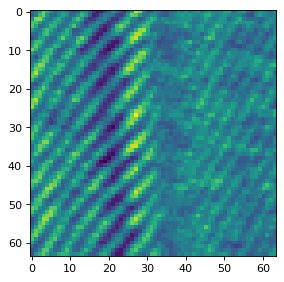

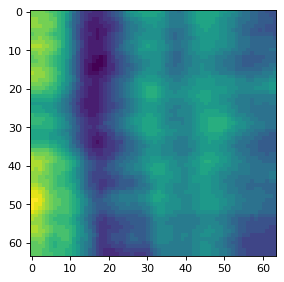

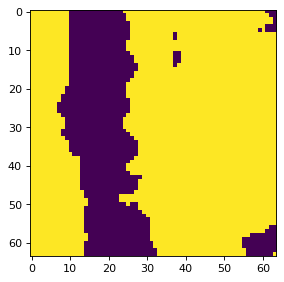

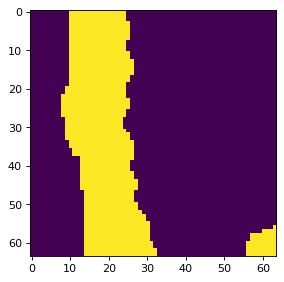

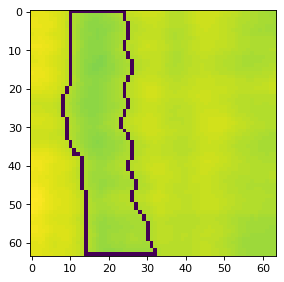

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


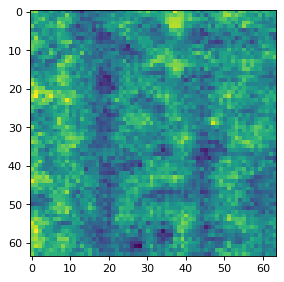

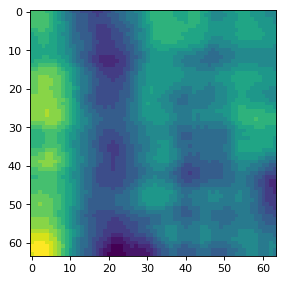

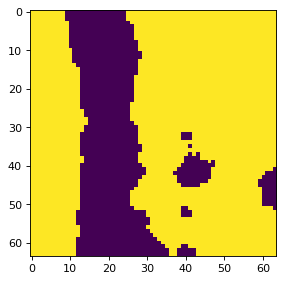

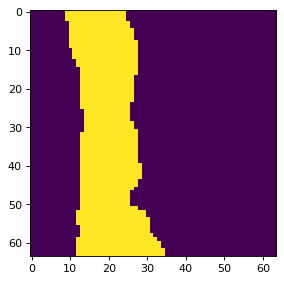

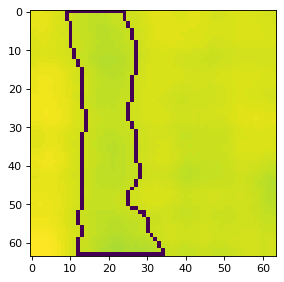

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------


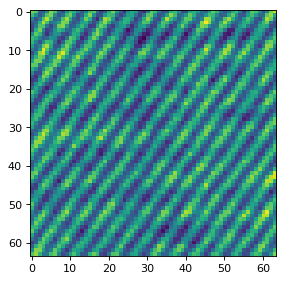

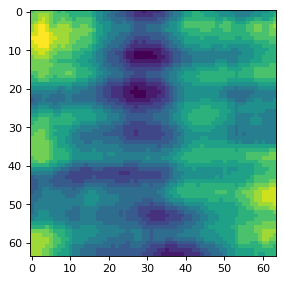

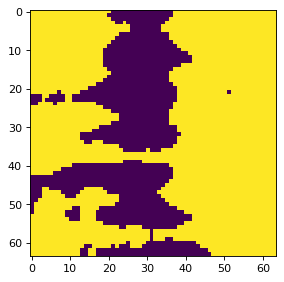

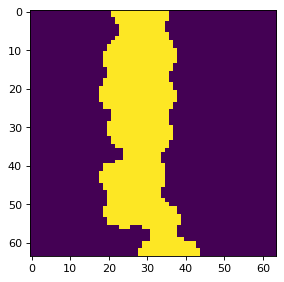

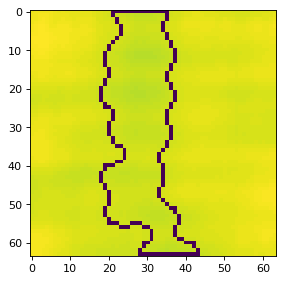

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-

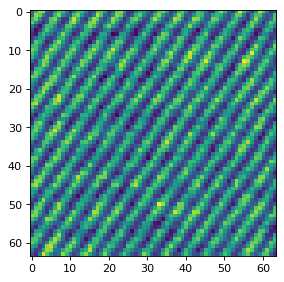

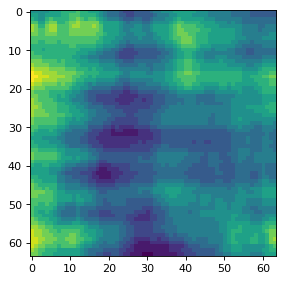

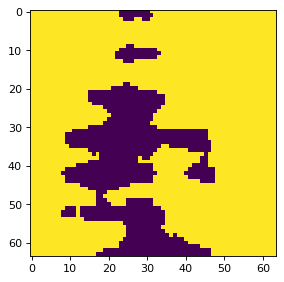

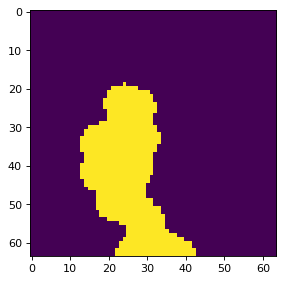

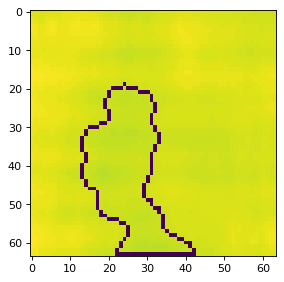

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
------

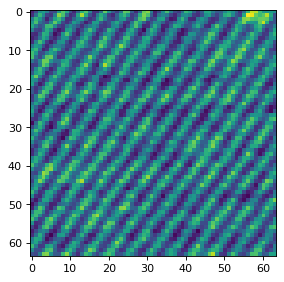

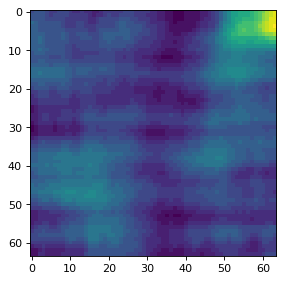

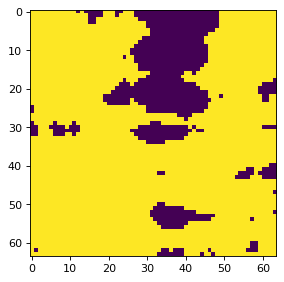

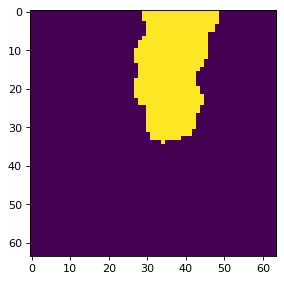

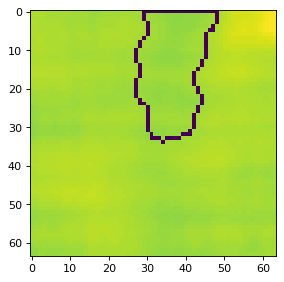

-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


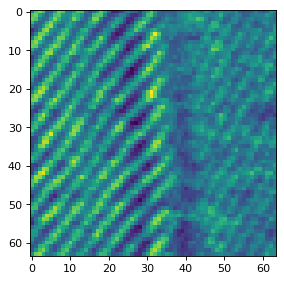

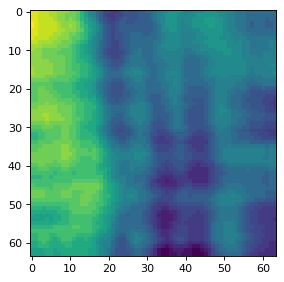

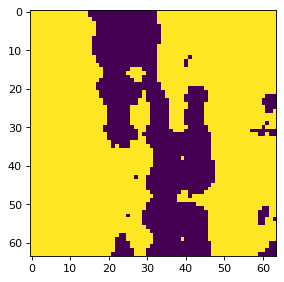

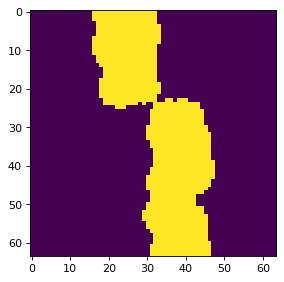

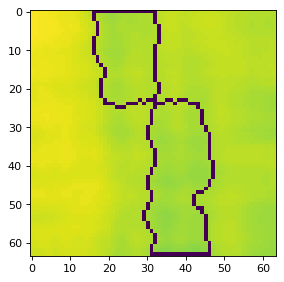

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------


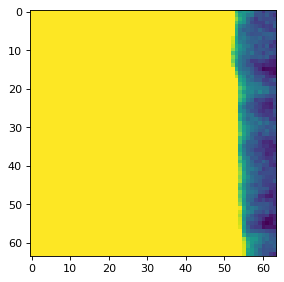

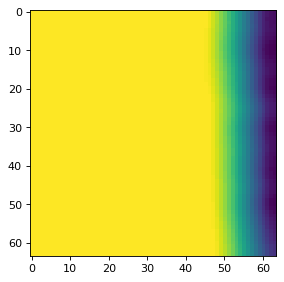

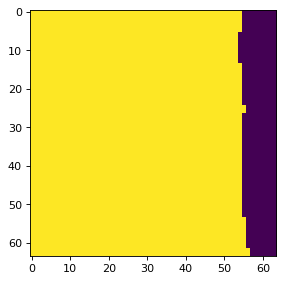

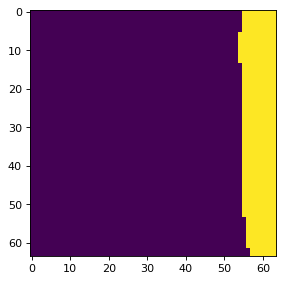

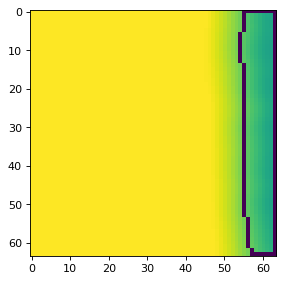

-----------------------------------------------------------


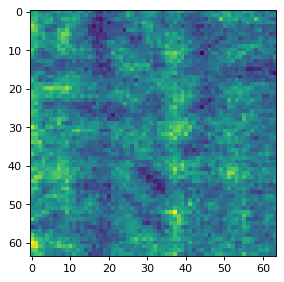

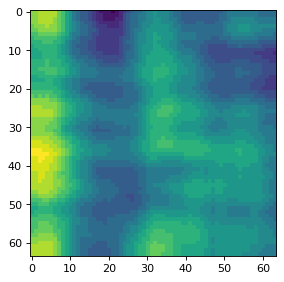

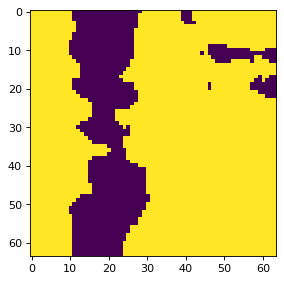

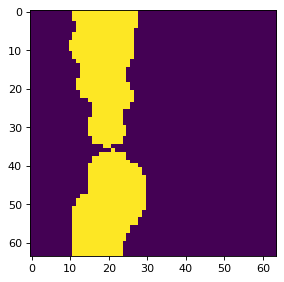

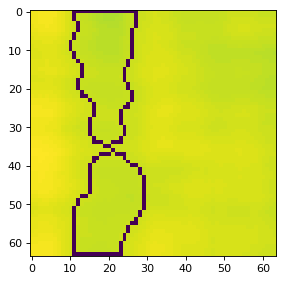

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


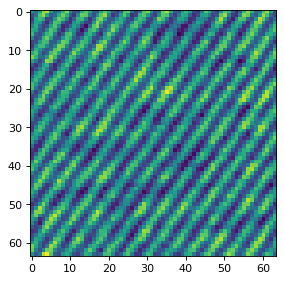

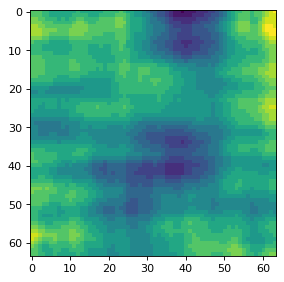

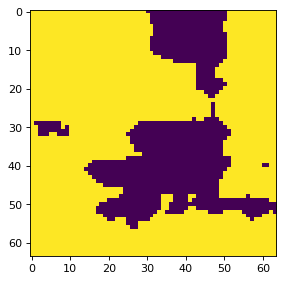

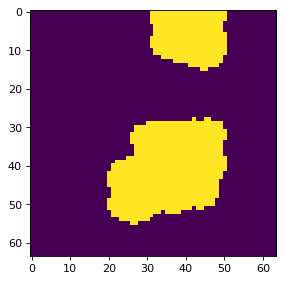

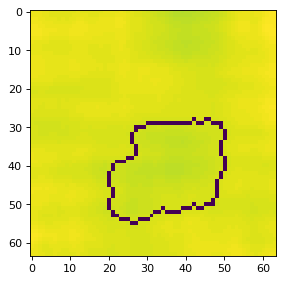

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-

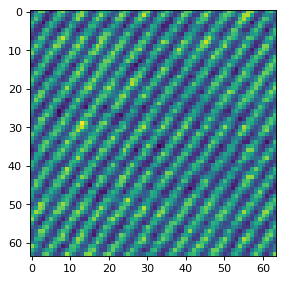

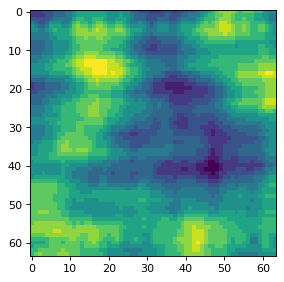

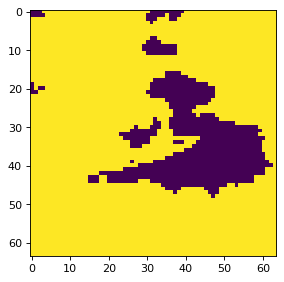

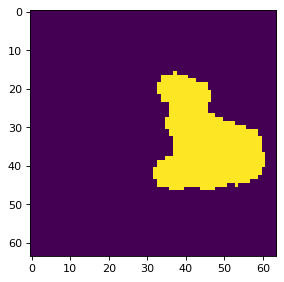

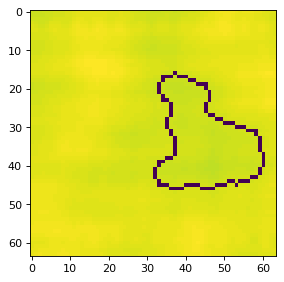

-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


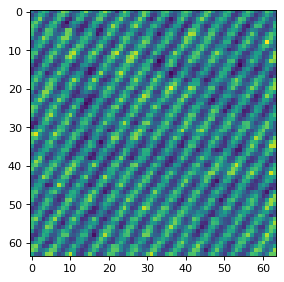

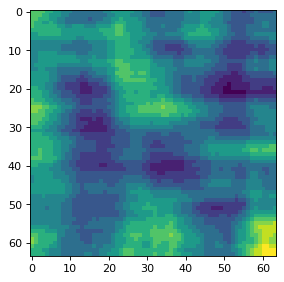

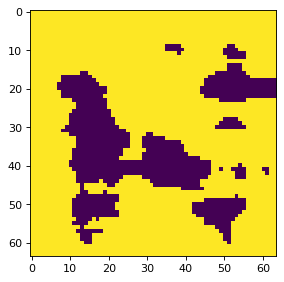

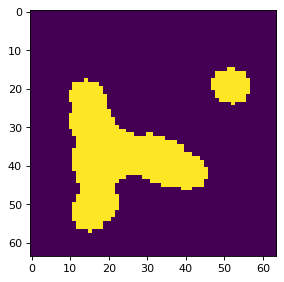

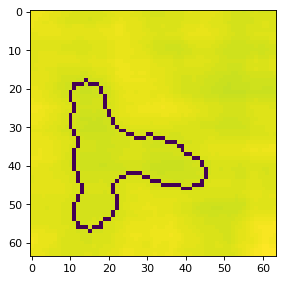

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


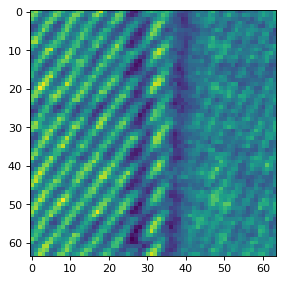

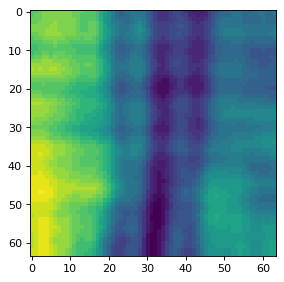

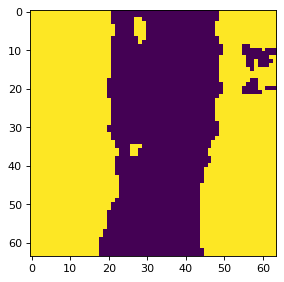

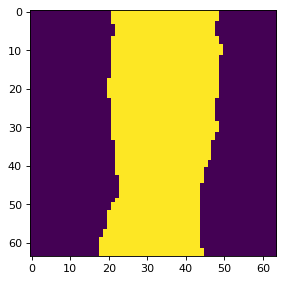

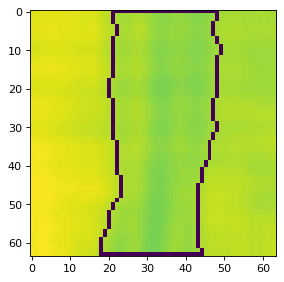

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


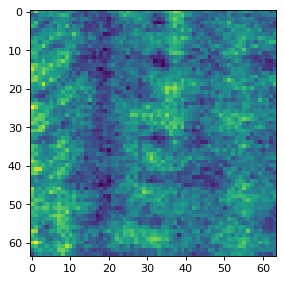

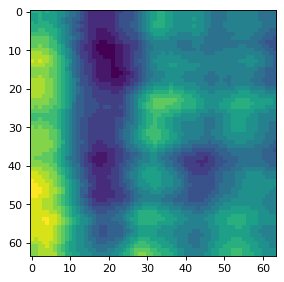

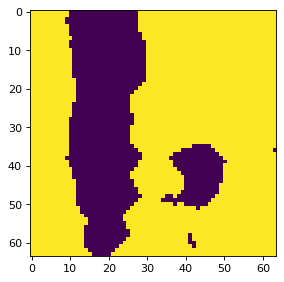

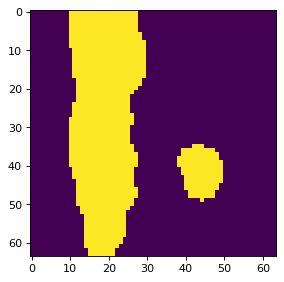

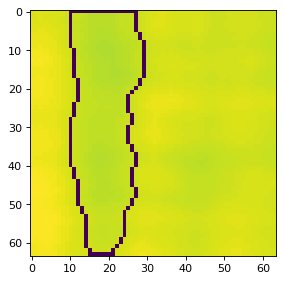

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


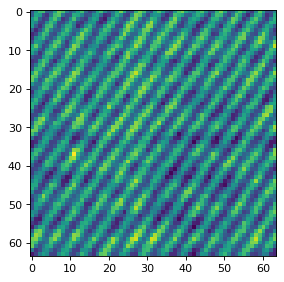

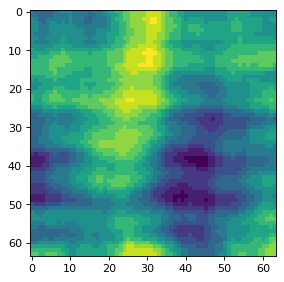

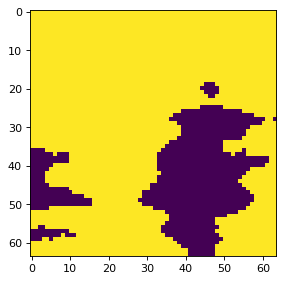

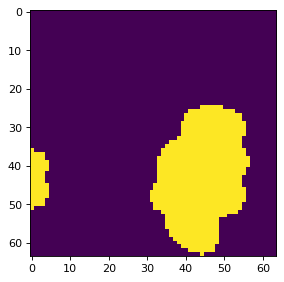

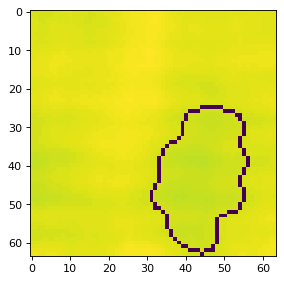

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


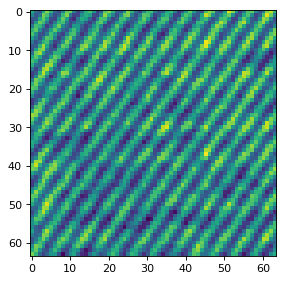

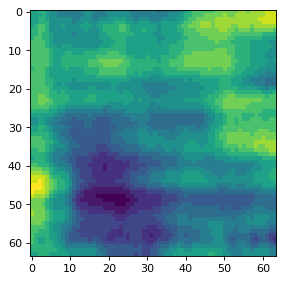

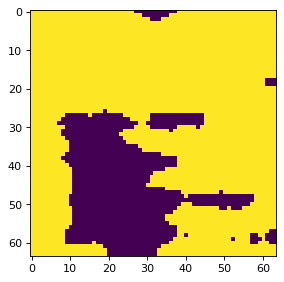

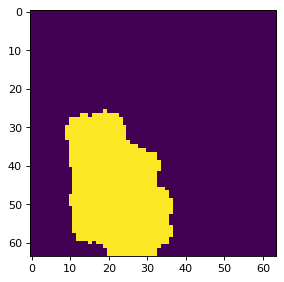

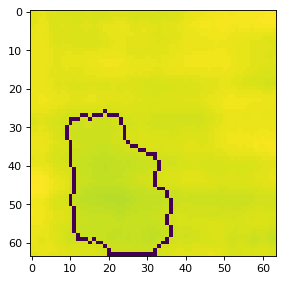

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is T

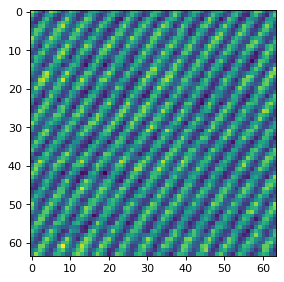

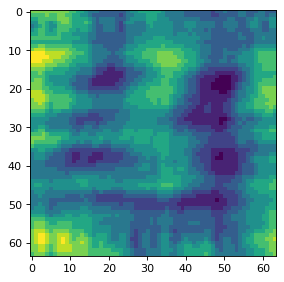

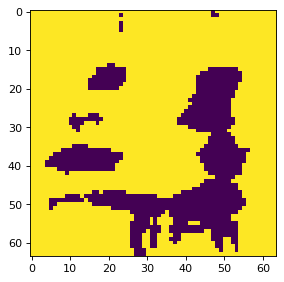

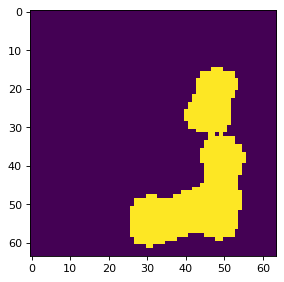

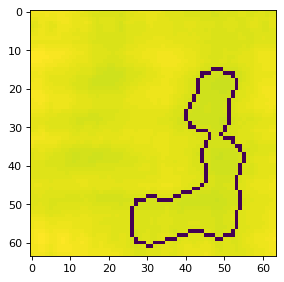

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob

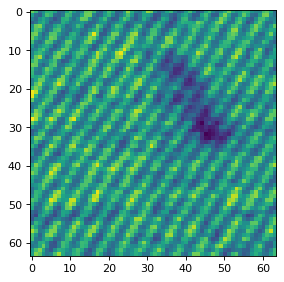

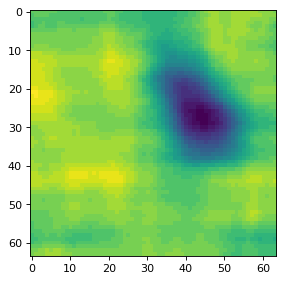

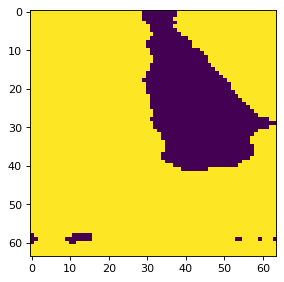

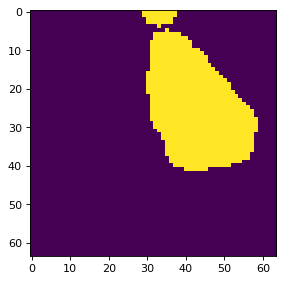

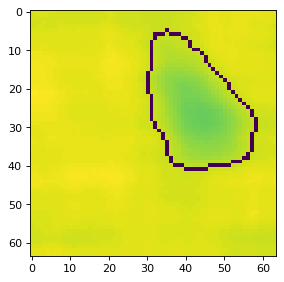

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


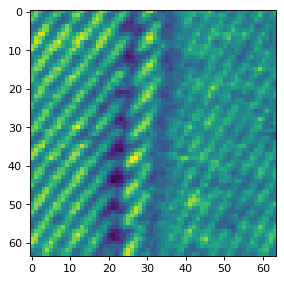

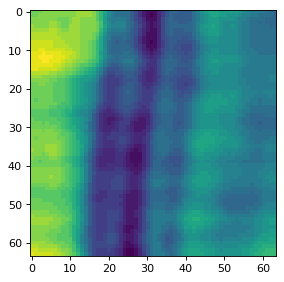

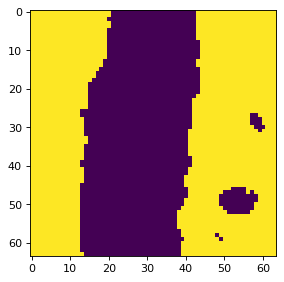

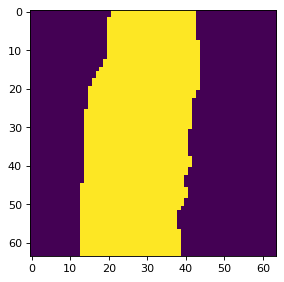

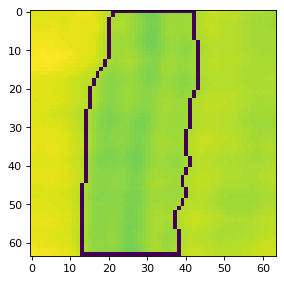

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


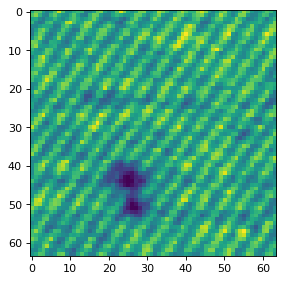

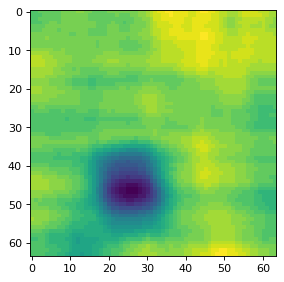

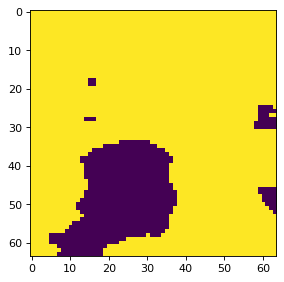

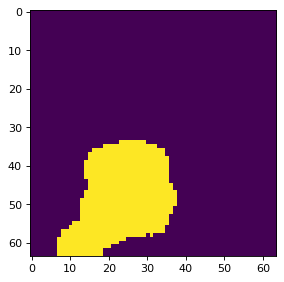

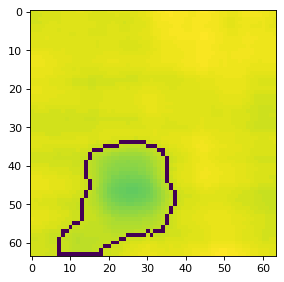

-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------
Blob Is Too Small
-----------------------------------------------------------


In [98]:
# final test for this 
for row in tiles:
    for tile in row:
        findBlobC(tile.roi)
        print("-----------------------------------------------------------")


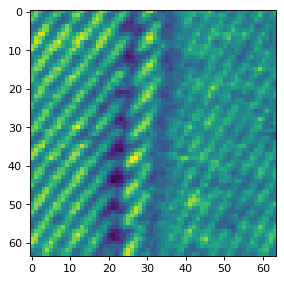

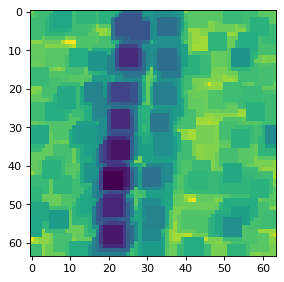

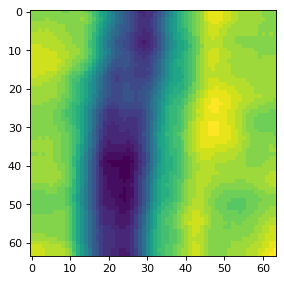

In [99]:
grey = cv2.cvtColor(defcetTiles[3].roi, cv2.COLOR_BGR2GRAY) # grey blob defect


thresh = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 3)
    
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(grey,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)


plt.imshow(grey)
plt.show()
# plt.imshow(thresh)
# plt.show()
plt.imshow(erosion)
plt.show()
# plt.imshow(dilation) ## doesnt realy help
# plt.show()   

blur = cv2.blur(erosion, (15,15))

plt.imshow(blur)
plt.show()   


In [100]:
def setLims(img, low, high): # sets highest and lowest pixel 
    new = []
    for row in img:
        newRow = []
        for pixel in row:
            if pixel < low:
                newRow.append(np.uint8(low))
            elif pixel > high:
                newRow.append(np.uint8(high))
            else:
                newRow.append(np.uint8(pixel))
        new.append(newRow)
                
    return np.asarray(new) # though this would help fixs shawdows but gave limited results
    

# Using erosion 
Here i used another form of morphology above the previous code designed to remove the background weave and shadows leaving only the larger defects. To do this i first needed to appply a light blur, then erode then apply a heavier blur.

In [101]:
def findBlobE(img):
    greyMaster = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grey blob defect

    #adjusted = setLims(greyMaster, 80,180) # didnt massively help
    lightBlur = cv2.blur(greyMaster, (5,5)) # used instead of gauusian blur for time efficirncy
    adjusted = setLims(lightBlur, 0,110) 

    kernel = np.ones((5,5),np.uint8)
    #erosion = cv2.erode(adjusted,kernel,iterations = 1)
    #erosion = cv2.erode(greyMaster,kernel,iterations = 1)

    erosion = cv2.erode(adjusted,kernel,iterations = 1)
    
    greyBlur = cv2.blur(erosion, (15,15))
    #greyBlur = cv2.GaussianBlur(erosion,(15,15),0)
    #print(min(greyBlur[1]))


    
    
    # do adaptive threshold on gray image
    thresh = cv2.adaptiveThreshold(greyBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 3) #doesnt work with erroision
    #thresh = cv2.adaptiveThreshold(erosion, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 3) #doesnt work with erroision

    # apply morphology open then close
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    blob = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)

    # invert blob
    blob = (255 - blob)

    # Get contours
    cnts = cv2.findContours(blob, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    if(len(cnts) == 0):
        print("no countours")
        return
    
    big_contour = max(cnts, key=cv2.contourArea)

    # test blob size was 500
    blob_area_thresh = 500
    blob_area = cv2.contourArea(big_contour)
    print(blob_area)
    if blob_area < blob_area_thresh:
        print("Blob Is Too Small")
        return

    # draw contour
    result = greyMaster.copy()
    cv2.drawContours(result, [big_contour], -1, (0,0,255), 1)

    print("mean of immage:")
    print(cv2.mean(greyMaster))

    mask = np.zeros(greyMaster.shape, np.uint8)
    cv2.drawContours(mask, big_contour, -1, 255, -1)

    print("mean of blob:")
    print(cv2.mean(greyMaster, mask=mask))

    
    plt.imshow(greyMaster)
    plt.show()
    plt.imshow(lightBlur)
    plt.show()
    plt.imshow(adjusted)
    plt.show()
    plt.imshow(erosion)
    plt.show()
    plt.imshow(greyBlur)
    plt.show()
    plt.imshow(thresh)
    plt.show()
    plt.imshow(blob)
    plt.show()
    plt.imshow(result)
    plt.show()

582.5
mean of immage:
(112.845947265625, 0.0, 0.0, 0.0)
mean of blob:
(109.95238095238095, 0.0, 0.0, 0.0)


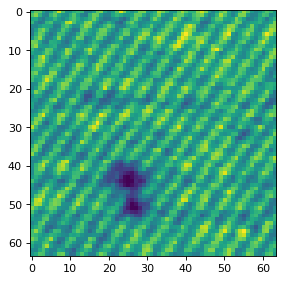

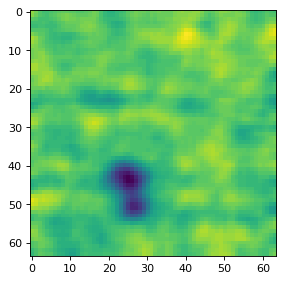

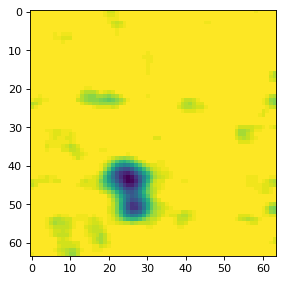

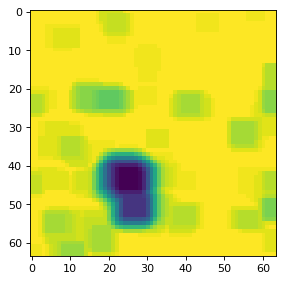

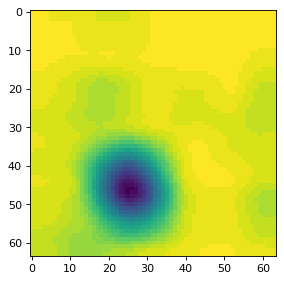

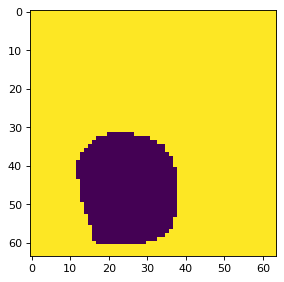

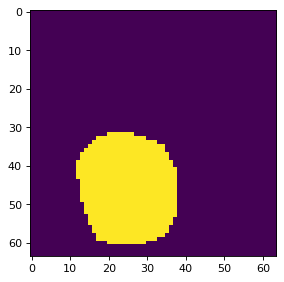

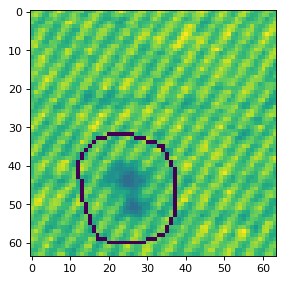

In [102]:
findBlobE(defcetTiles[5].roi)


955.0
mean of immage:
(115.544921875, 0.0, 0.0, 0.0)
mean of blob:
(123.13636363636364, 0.0, 0.0, 0.0)


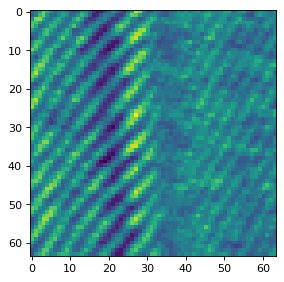

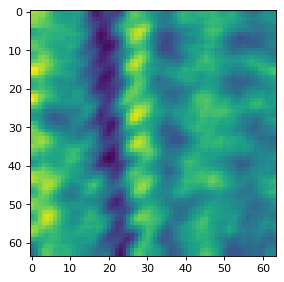

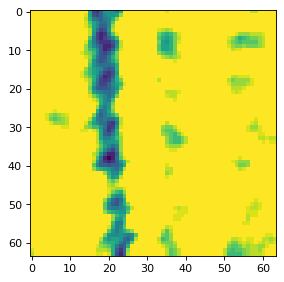

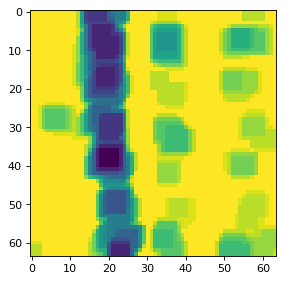

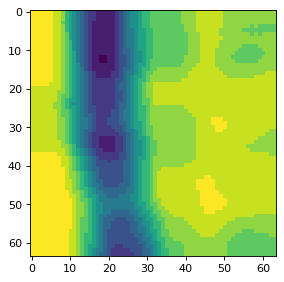

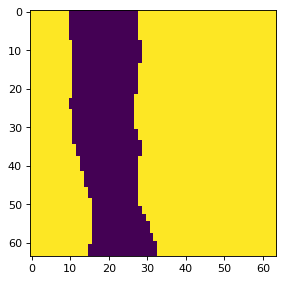

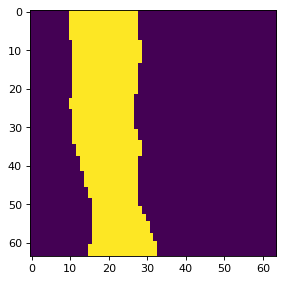

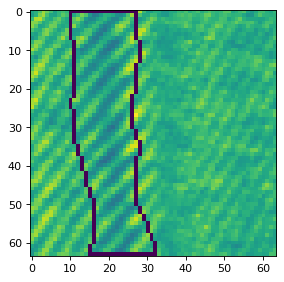

-----------------------------------------------------------
1071.0
mean of immage:
(115.2373046875, 0.0, 0.0, 0.0)
mean of blob:
(108.25373134328358, 0.0, 0.0, 0.0)


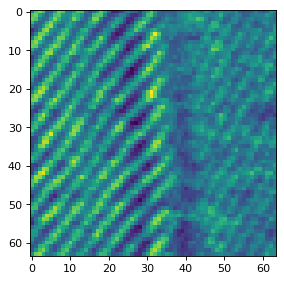

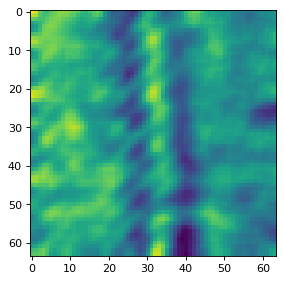

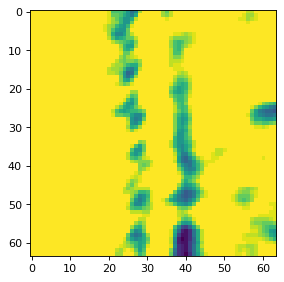

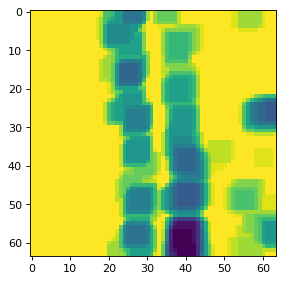

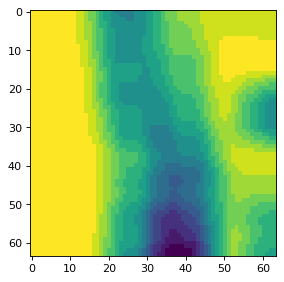

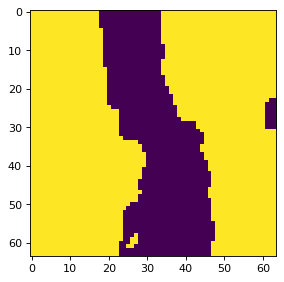

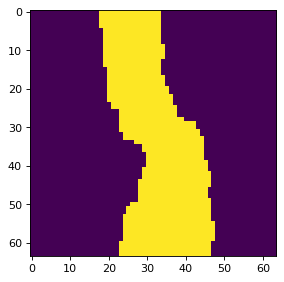

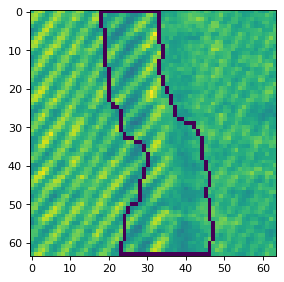

-----------------------------------------------------------
1483.0
mean of immage:
(113.1259765625, 0.0, 0.0, 0.0)
mean of blob:
(118.6111111111111, 0.0, 0.0, 0.0)


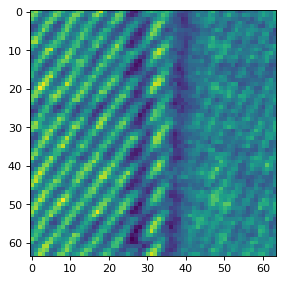

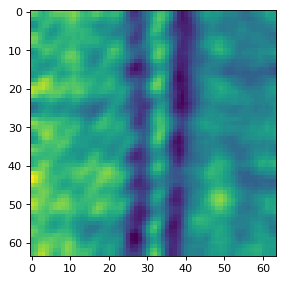

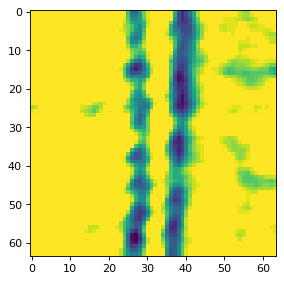

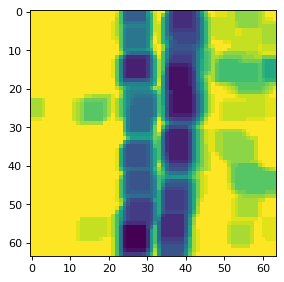

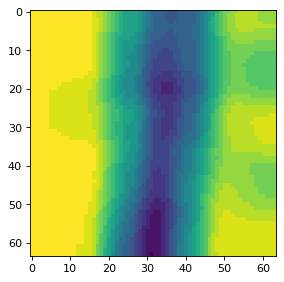

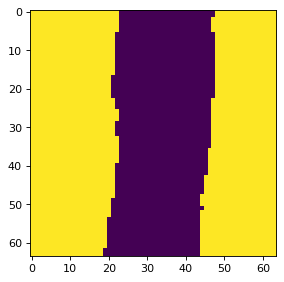

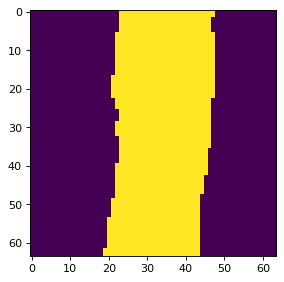

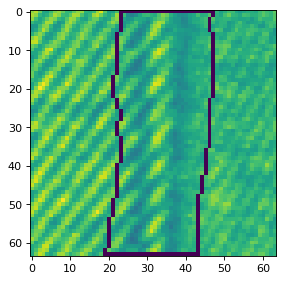

-----------------------------------------------------------
1512.0
mean of immage:
(112.126708984375, 0.0, 0.0, 0.0)
mean of blob:
(115.96875, 0.0, 0.0, 0.0)


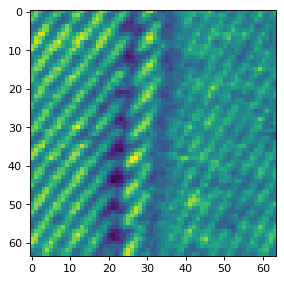

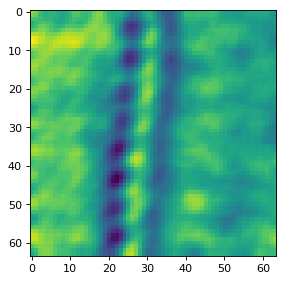

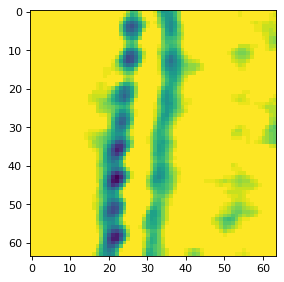

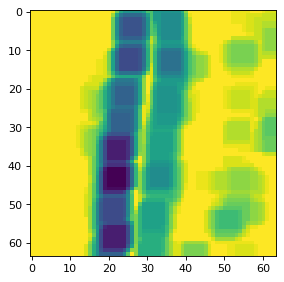

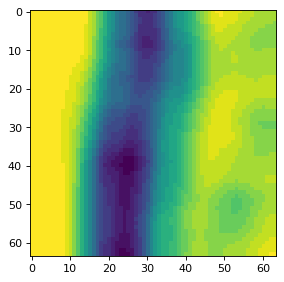

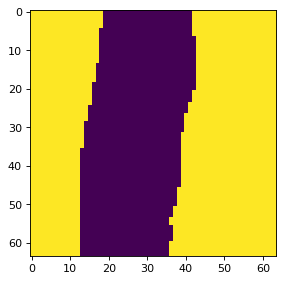

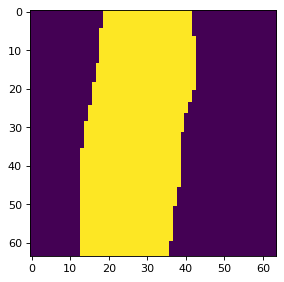

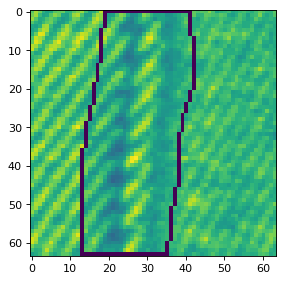

-----------------------------------------------------------
767.0
mean of immage:
(116.328369140625, 0.0, 0.0, 0.0)
mean of blob:
(113.44642857142857, 0.0, 0.0, 0.0)


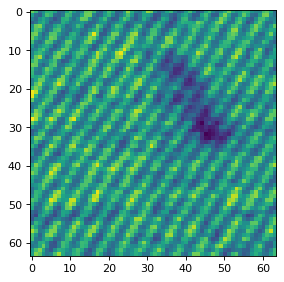

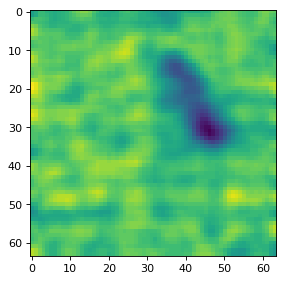

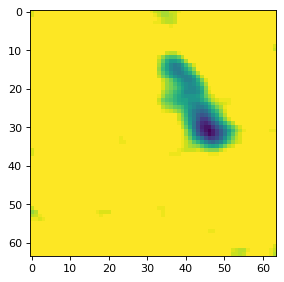

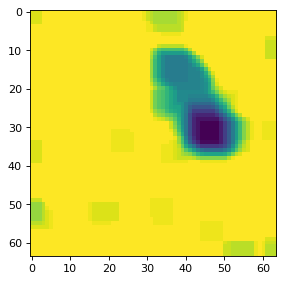

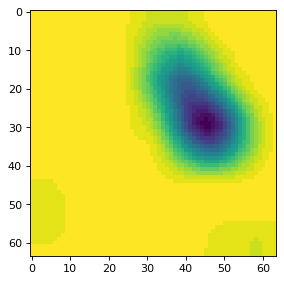

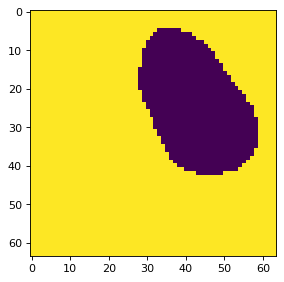

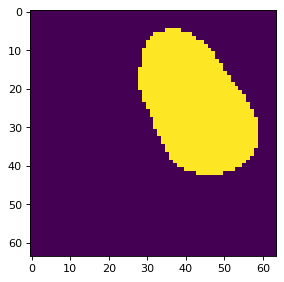

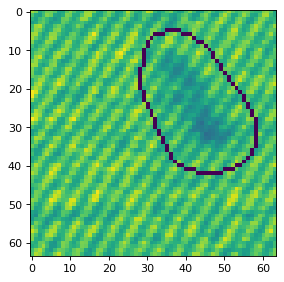

-----------------------------------------------------------
582.5
mean of immage:
(112.845947265625, 0.0, 0.0, 0.0)
mean of blob:
(109.95238095238095, 0.0, 0.0, 0.0)


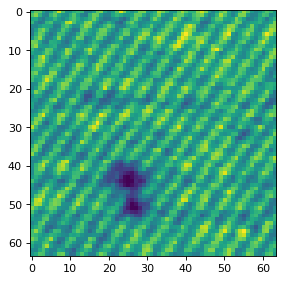

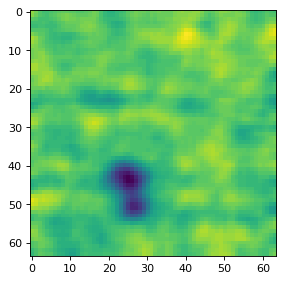

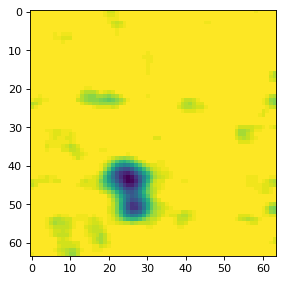

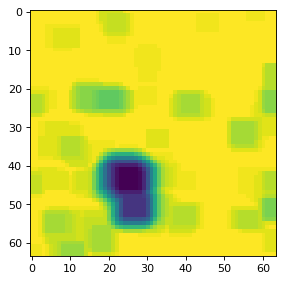

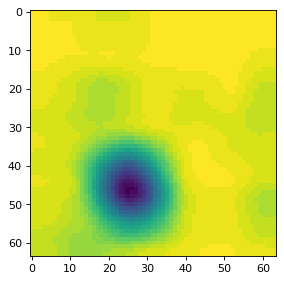

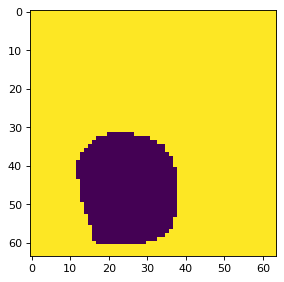

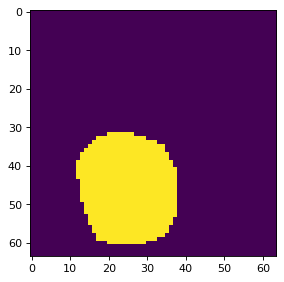

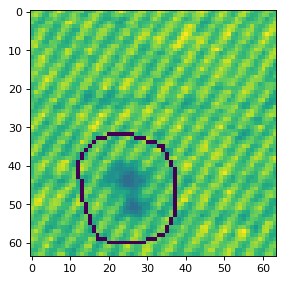

-----------------------------------------------------------


In [103]:
for tile in defcetTiles:
    findBlobE(tile.roi)
    print("-----------------------------------------------------------")


In [104]:
# findBlobC(goodTiles[4].roi)
for tile in goodTiles:
    findBlobE(tile.roi)
    print("-----------------------------------------------------------")

no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------


no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
--------------------------------------

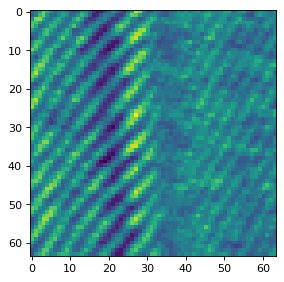

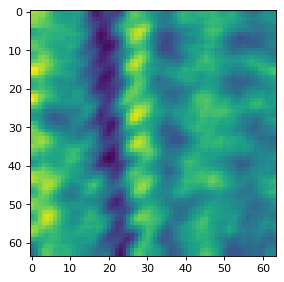

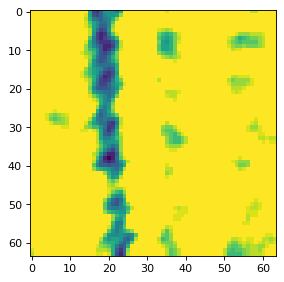

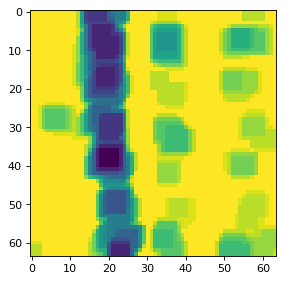

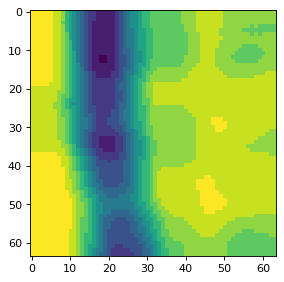

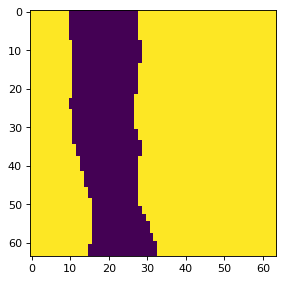

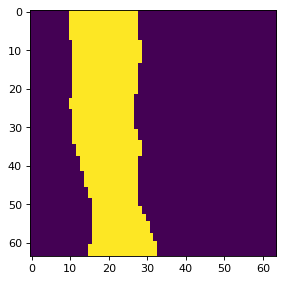

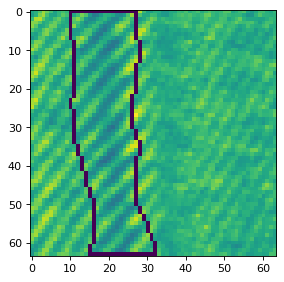

-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
118.0
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
----------------------------------------

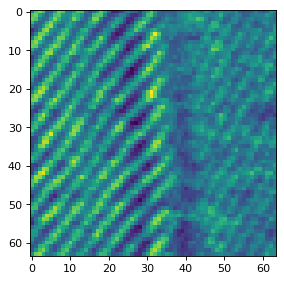

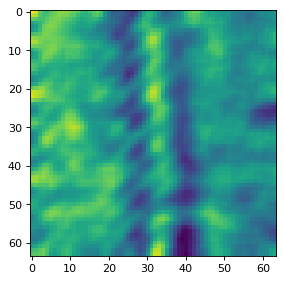

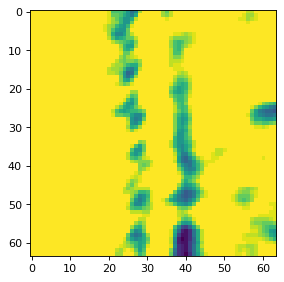

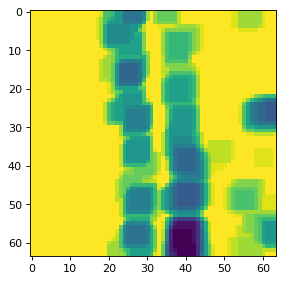

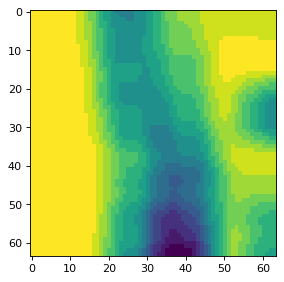

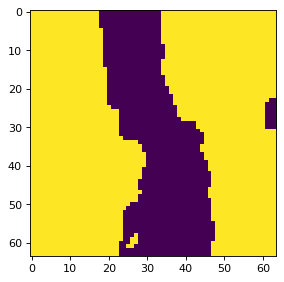

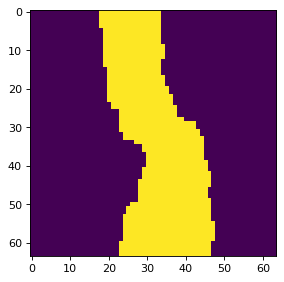

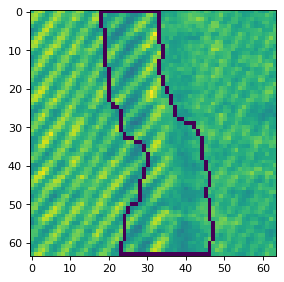

-----------------------------------------------------------
no countours
-----------------------------------------------------------
67.5
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
53.5
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-------------------------------

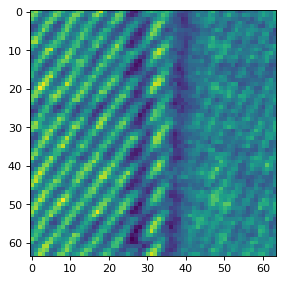

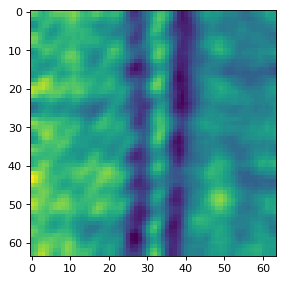

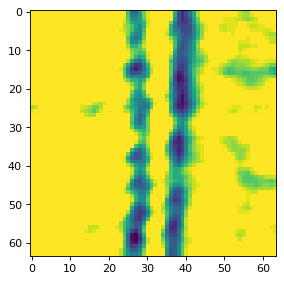

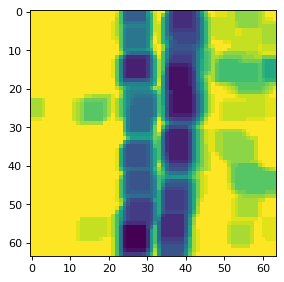

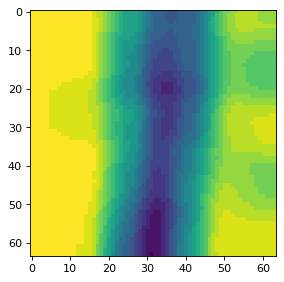

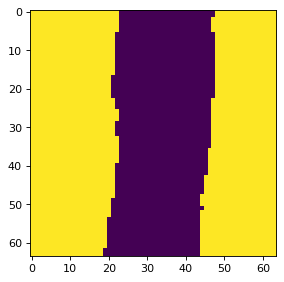

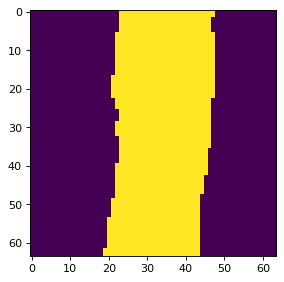

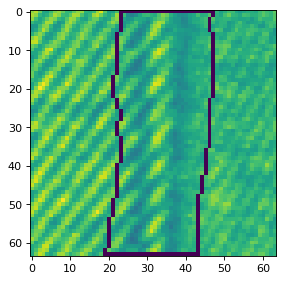

-----------------------------------------------------------
73.5
Blob Is Too Small
-----------------------------------------------------------
22.0
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
99.5
Blob Is Too Small
-----------------------------------------------------------
249.5
Blob Is Too Small
-----------------------------------------------------------
136.5
Blob Is Too Small
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours

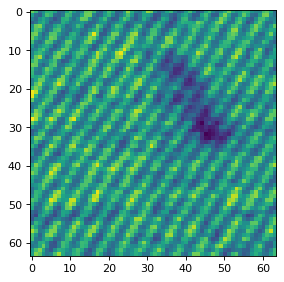

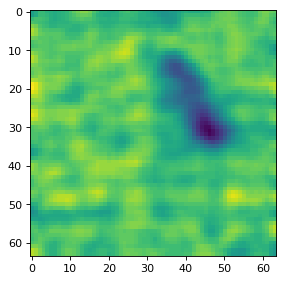

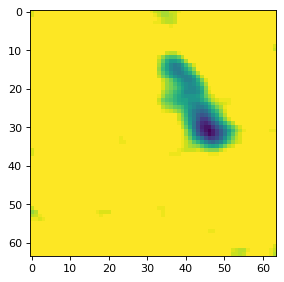

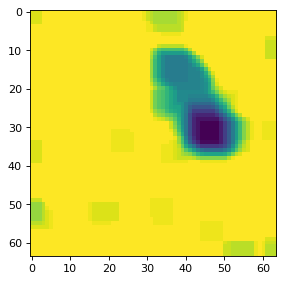

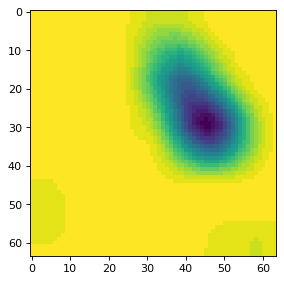

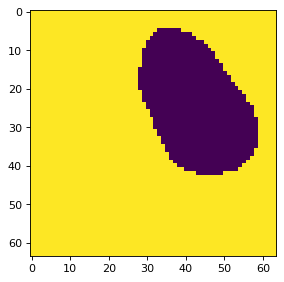

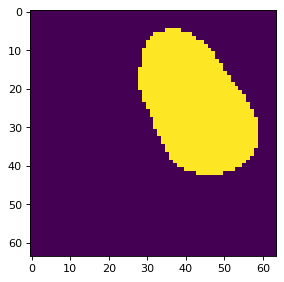

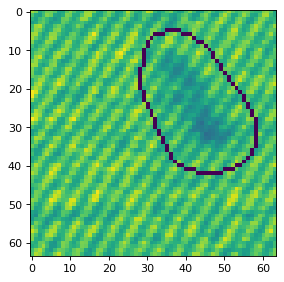

-----------------------------------------------------------
no countours
-----------------------------------------------------------
no countours
-----------------------------------------------------------
143.5
Blob Is Too Small
-----------------------------------------------------------
1512.0
mean of immage:
(112.126708984375, 0.0, 0.0, 0.0)
mean of blob:
(115.96875, 0.0, 0.0, 0.0)


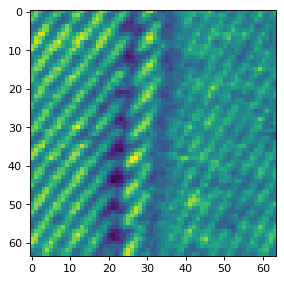

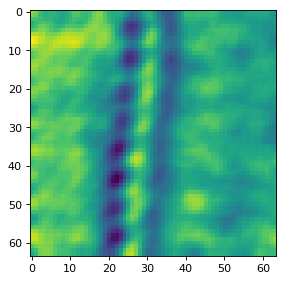

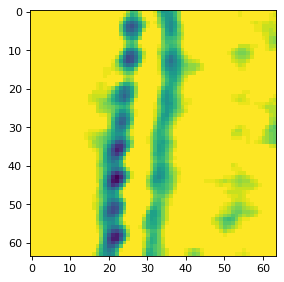

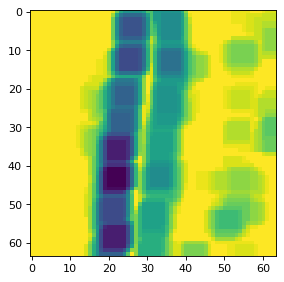

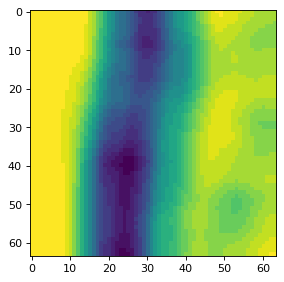

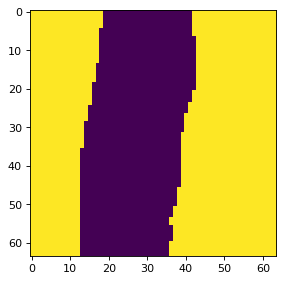

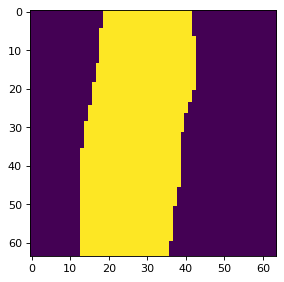

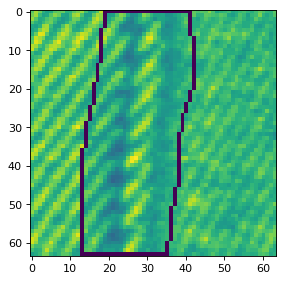

-----------------------------------------------------------
74.5
Blob Is Too Small
-----------------------------------------------------------
582.5
mean of immage:
(112.845947265625, 0.0, 0.0, 0.0)
mean of blob:
(109.95238095238095, 0.0, 0.0, 0.0)


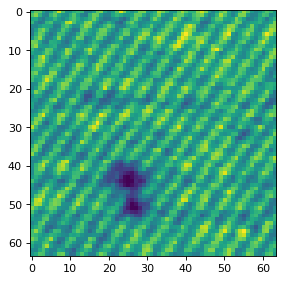

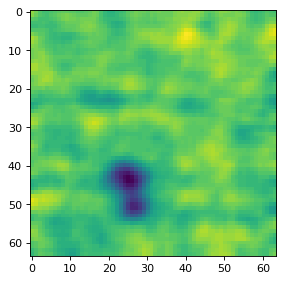

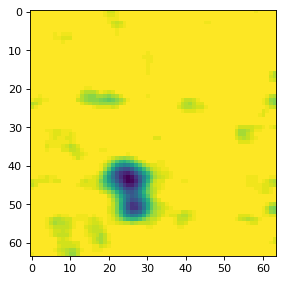

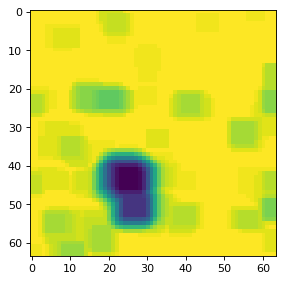

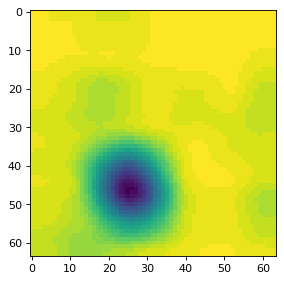

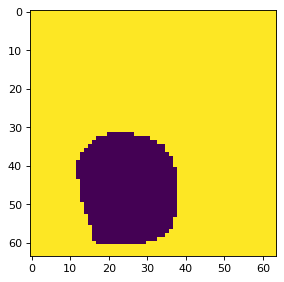

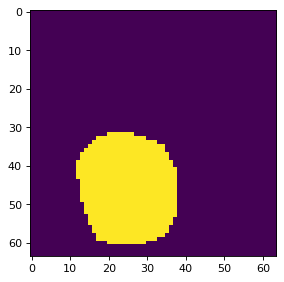

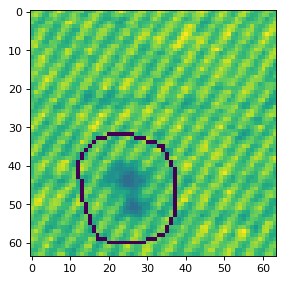

-----------------------------------------------------------
99.0
Blob Is Too Small
-----------------------------------------------------------
80.0
Blob Is Too Small
-----------------------------------------------------------
193.0
Blob Is Too Small
-----------------------------------------------------------
48.0
Blob Is Too Small
-----------------------------------------------------------


In [105]:
# final test for this 
for row in tiles:
    for tile in row:
        findBlobE(tile.roi)
        print("-----------------------------------------------------------")


# Final Contour Code

In [106]:
def findDefect(img):
    exitCode = 0 # an exit code of 0 means a blob has been detected
    
    greyMaster = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grey blob defect

    # Light blur to lighten up and reduce size of small shadows
    lightBlur = cv2.blur(greyMaster, (5,5)) # used instead of gauusian blur for time efficirncy
    adjusted = setLims(lightBlur, 0 ,110) #Needed but massively increases time to run


    kernel = np.ones((5,5),np.uint8) # forms the matrix used when eroading
    erosion = cv2.erode(adjusted,kernel,iterations = 1)
    
    # large blur to hide background weave and increase the size of defects
    greyBlur = cv2.blur(erosion, (15,15))

    # do adaptive threshold on gray image
    thresh = cv2.adaptiveThreshold(greyBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 3) #doesnt work with erroision

    # apply morphology open then close
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    blob = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    blob = cv2.morphologyEx(blob, cv2.MORPH_CLOSE, kernel)

    # invert blob
    blob = (255 - blob)

    # Get contours
    cnts = cv2.findContours(blob, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    if(len(cnts) == 0):
        exitCode = 2 # no countours found
        
    # initalisng return varibles if no countours ar found
    result = None
    imageMean = 0
    blobMean = 0
    blob_area = 0
    
    if(exitCode == 0):
        big_contour = max(cnts, key=cv2.contourArea)

        # test blob size was 500
        blob_area_thresh = 500
        blob_area = cv2.contourArea(big_contour)
        if blob_area < blob_area_thresh:
            exitCode = 1 # blob is too small

        # draw contour
        result = greyMaster.copy()
        cv2.drawContours(result, [big_contour], -1, (0,0,255), 1)

        imageMean = cv2.mean(greyMaster)[0]

        # creates a mask of the blob shape, this can be applied to the orignal image to get the mean pixel color of the blob
        mask = np.zeros(greyMaster.shape, np.uint8) 
        cv2.drawContours(mask, big_contour, -1, 255, -1) 

        blobMean = cv2.mean(greyMaster, mask=mask)[0]

    return result, imageMean, blobMean,blob_area, exitCode
    


0
112.845947265625
109.95238095238095
582.5


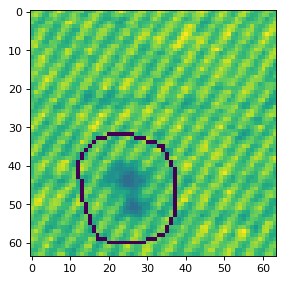

In [107]:
result, imageMean, blobMean, blob_area, exitCode = findDefect(defcetTiles[5].roi)
print(exitCode)
print(imageMean)
print(blobMean)
print(blob_area)
plt.imshow(result)
plt.show()

Going to time it just too see.

In [108]:
start = time.time()

result, imageMean, blobMean, blob_area, exitCode = findDefect(defcetTiles[5].roi)

end = time.time()

timeEllapsed = (end - start) * 1000

print('Execution time:', timeEllapsed, ' ms')


Execution time: 27.92501449584961  ms


In [109]:
startCPU = time.process_time()

result, imageMean, blobMean, blob_area, exitCode = findDefect(defcetTiles[5].roi)

endCPU = time.process_time()

timeEllapsedCPU = (endCPU - startCPU) * 1000

print('CPU time:', timeEllapsedCPU, ' ms')


CPU time: 15.625  ms


The very fast CPU performance and the lack of a serial overhead will mean the code massively benifits for parrellisation. This maybe a strech goal. I belive the fast CPU time is due to all the openCV operations are matrix opperations and not itterative (need to check).

0
115.544921875
123.13636363636364
955.0


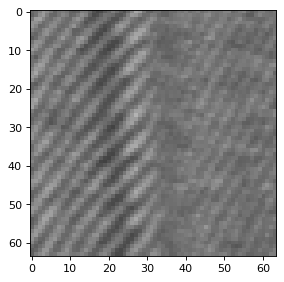

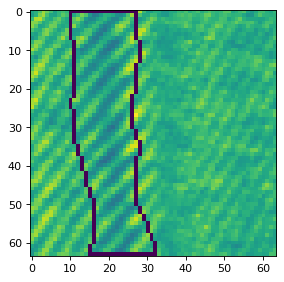

--------------------------------------------------
0
115.2373046875
108.25373134328358
1071.0


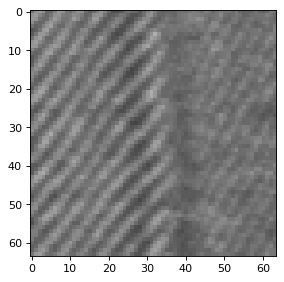

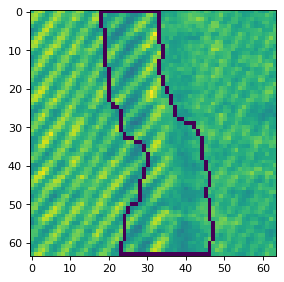

--------------------------------------------------
0
113.1259765625
118.6111111111111
1483.0


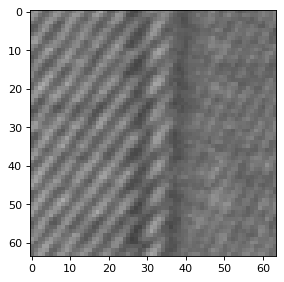

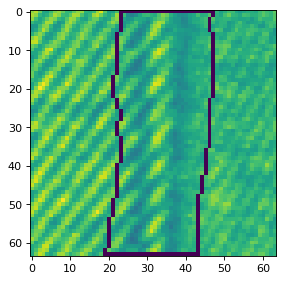

--------------------------------------------------
0
116.328369140625
113.44642857142857
767.0


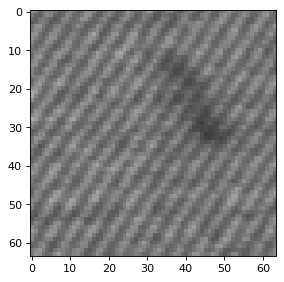

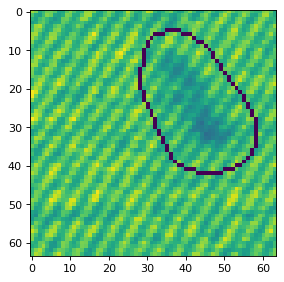

--------------------------------------------------
0
112.126708984375
115.96875
1512.0


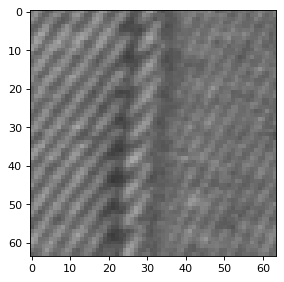

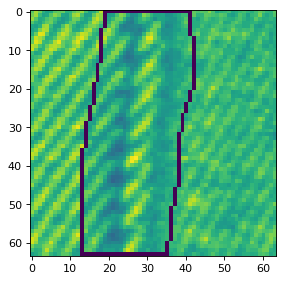

--------------------------------------------------
0
112.845947265625
109.95238095238095
582.5


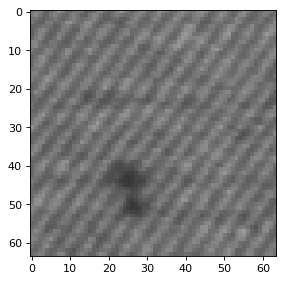

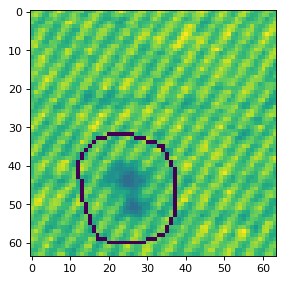

--------------------------------------------------


In [110]:
for row in tiles:
    for tile in row:
        result, imageMean, blobMean, blob_area, exitCode = findDefect(tile.roi)
        if(exitCode == 0):
            print(exitCode)
            print(imageMean)
            print(blobMean)
            print(blob_area)
            plt.imshow(tile.roi)
            plt.show()
            plt.imshow(result)
            plt.show()
            print("--------------------------------------------------")